In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

from main_single_knapsack_transfer import main as main_transfer
from main_single_knapsack_bandit import main as main_bandit
from main_single_knapsack_cc import main as main_cc
from utils.visualization_tools import *

from evolution.chromosome import *
from utils.data_manipulators import *
# from problems.knapsack_generator import knapsack_generator
%matplotlib inline

In [9]:
SRC_SHAPES = ['-v', '-^', '-<', '-D']
TARGET_SHAPE = '-o'
SRC_COLORS = ['#f368e0', '#ff9f43', '#ee5253', '#0abde3']
TARGET_COLOR = '#10ac84'


def get_fitness(results):
    fitnesses = np.zeros_like(results)
    for i, rep in enumerate(results):
        for j, gen in enumerate(rep):
            if gen.any() is not None:
                fitnesses[i, j, :] = Chromosome.fitness_to_numpy(gen)
    return fitnesses

def time_concat(time_hist):
    for i in range(1, len(time_hist)):
        time_hist[i] += np.abs(time_hist[i-1])
    return time_hist

def get_convergence_index(mean_fitnesses, converge_limit=5):
    not_changed_count = 0
    
    for idx, fitness in enumerate(mean_fitnesses):
        
        if (fitness - mean_fitnesses[idx-1])/mean_fitnesses[idx-1]< 0.0001:
            not_changed_count += 1
        else:
            not_changed_count = 0
            
        if not_changed_count == converge_limit:
            break
    
    return idx

def align_convergence(mean_fitnesses, mean_times, convergence_time, std_fitnesses=None):
    if mean_times[-1] <= convergence_time:
        return mean_fitnesses, mean_times
    
    for idx, t in enumerate(mean_times):
        if t > convergence_time:
            break
    if std_fitnesses is not None:
        return mean_fitnesses[:idx+1], mean_times[:idx+1], std_fitnesses[:idx+1]
    return mean_fitnesses[:idx+1], mean_times[:idx+1]

        
def to_right_gen(inp):
    new_inp = np.zeros((inp.shape[0], 100, inp.shape[2]))
    for i in range(100):
        
        if i%2 ==0 and int(i/2)<inp.shape[1]:
            new_inp[:, i, :] = inp[:, int(i/2), :]
        else:
            new_inp[:, i, :] = new_inp[:, i-1, :]
    return new_inp

# 250 Related Source Tasks

In [3]:
class args:
    src_version = 'kp1000-250-a'
    stop_condition = True
    sample_size=50
    time_limits = None
    reps = 30
    transfer = True
    version = 'to'
    delta = 2
    buildmodel = False
    psize = 50
    save_path = 'results/main_multi_transfer_knapsack_kp1000-250-a_50s'
    efficient = False
    gen = 100

In [25]:
start = time()
fitness_hist_transfer, alpha_transfer, fitness_time_transfer = main_transfer(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_transfer_knapsack_kp1000-250-a_50s', [fitness_hist_transfer, alpha_transfer, fitness_time_transfer])

All source problems & target problems are loaded: length = 1000


KeyboardInterrupt: 

In [ ]:
class args:
    src_version = 'kp1000-250-a'
    stop_condition = True
    sample_size=50
    reps = 30
    transfer = True
    version = 'to'
    mutation_strength = 1
    time_limits=None
    delta = 2
    buildmodel = False
    psize = 50
    efficient = False
    gen = 100

In [6]:
start = time()
fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit = main_bandit(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_bandit_knapsack_kp1000-250-a_50s', [fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit])

All source problems & target problems are loaded: length = 1000
------------------------ rep: 0 ---------------------
Generation 0 best fitness = 2908.000000
Generation 1 best fitness = 2908.000000
Mixture coefficients: [5.69952323e-04 9.99430048e-01]
Generation 2 best fitness = 3810.000000
Generation 3 best fitness = 3810.000000
Mixture coefficients: [2.24185970e-04 9.99775814e-01]
Generation 4 best fitness = 3810.000000
Generation 5 best fitness = 3810.000000
Mixture coefficients: [0.0051278 0.9948722]
Generation 6 best fitness = 3810.000000
Generation 7 best fitness = 3810.000000
Mixture coefficients: [0.00840557 0.99159443]
Generation 8 best fitness = 3810.000000
Generation 9 best fitness = 3810.000000
Mixture coefficients: [0.00618594 0.99381406]
Generation 10 best fitness = 3810.000000
Generation 11 best fitness = 3810.000000
Mixture coefficients: [0.00467784 0.99532216]
Generation 12 best fitness = 3810.000000
Generation 13 best fitness = 3810.000000
Mixture coefficients: [0.008

Mixture coefficients: [0.00935164 0.99064836]
Generation 28 best fitness = 3980.000000
Generation 29 best fitness = 3984.000000
Mixture coefficients: [0.0023729 0.9976271]
Generation 30 best fitness = 4017.000000
Generation 31 best fitness = 4017.000000
Mixture coefficients: [0.00394902 0.99605098]
Generation 32 best fitness = 4028.000000
Generation 33 best fitness = 4030.000000
Mixture coefficients: [0.00649943 0.99350057]
Generation 34 best fitness = 4061.000000
Generation 35 best fitness = 4061.000000
Mixture coefficients: [0.0060093 0.9939907]
Generation 36 best fitness = 4079.000000
Generation 37 best fitness = 4079.000000
Mixture coefficients: [0.00457893 0.99542107]
Generation 38 best fitness = 4079.000000
Generation 39 best fitness = 4085.000000
Mixture coefficients: [0.00562073 0.99437927]
Generation 40 best fitness = 4099.000000
Generation 41 best fitness = 4110.000000
Mixture coefficients: [0.00583741 0.99416259]
Generation 42 best fitness = 4128.000000
Generation 43 best fi

Generation 57 best fitness = 4180.000000
Mixture coefficients: [0.00499184 0.99500816]
Generation 58 best fitness = 4181.000000
Generation 59 best fitness = 4181.000000
Mixture coefficients: [0.00318805 0.99681195]
Generation 60 best fitness = 4181.000000
Generation 61 best fitness = 4182.000000
Mixture coefficients: [3.39524686e-04 9.99660475e-01]
Generation 62 best fitness = 4183.000000
Generation 63 best fitness = 4183.000000
Mixture coefficients: [0.00745835 0.99254165]
Generation 64 best fitness = 4183.000000
Generation 65 best fitness = 4183.000000
Mixture coefficients: [0.00491844 0.99508156]
Generation 66 best fitness = 4183.000000
Generation 67 best fitness = 4183.000000
Mixture coefficients: [0.00269853 0.99730147]
Generation 68 best fitness = 4183.000000
Generation 69 best fitness = 4183.000000
Mixture coefficients: [0.00564791 0.99435209]
Generation 70 best fitness = 4183.000000
Generation 71 best fitness = 4183.000000
Mixture coefficients: [0.00579237 0.99420763]
Generatio

Generation 85 best fitness = 4182.000000
Mixture coefficients: [0.00942894 0.99057106]
Generation 86 best fitness = 4182.000000
Generation 87 best fitness = 4182.000000
Mixture coefficients: [0.00114859 0.99885141]
Generation 88 best fitness = 4182.000000
Generation 89 best fitness = 4182.000000
Normalized reward sanity check
Mixture coefficients: [0.00418767 0.99581233]
Generation 90 best fitness = 4182.000000


/home/oriea/Codes/gitlab/cc-transfer-optimization/to/mixture_model.py:334: RuntimeWarning: invalid value encountered in true_divide
  normalized_prob_ratio = prob_ratio/sum(prob_ratio)


Generation 91 best fitness = 4182.000000
Mixture coefficients: [0.00562336 0.99437664]
Generation 92 best fitness = 4183.000000
Generation 93 best fitness = 4183.000000
Mixture coefficients: [0.00400783 0.99599217]
Generation 94 best fitness = 4183.000000
Generation 95 best fitness = 4183.000000
Mixture coefficients: [0.00792963 0.99207037]
Generation 96 best fitness = 4183.000000
Generation 97 best fitness = 4183.000000
Mixture coefficients: [0.00783682 0.99216318]
Generation 98 best fitness = 4183.000000
Generation 99 best fitness = 4183.000000
------------------------ rep: 4 ---------------------
Generation 0 best fitness = 2939.000000
Generation 1 best fitness = 2942.000000
Mixture coefficients: [0.00476983 0.99523017]
Generation 2 best fitness = 3014.000000
Generation 3 best fitness = 3036.000000
Mixture coefficients: [0.00418384 0.99581616]
Generation 4 best fitness = 3834.000000
Generation 5 best fitness = 3834.000000
Mixture coefficients: [0.00578532 0.99421468]
Generation 6 be

Mixture coefficients: [0.0065247 0.9934753]
Generation 20 best fitness = 3863.000000
Generation 21 best fitness = 3890.000000
Mixture coefficients: [0.00976774 0.99023226]
Generation 22 best fitness = 3890.000000
Generation 23 best fitness = 3916.000000
Mixture coefficients: [0.00130544 0.99869456]
Generation 24 best fitness = 3946.000000
Generation 25 best fitness = 3960.000000
Mixture coefficients: [0.00197727 0.99802273]
Generation 26 best fitness = 3960.000000
Generation 27 best fitness = 3975.000000
Mixture coefficients: [0.00775745 0.99224255]
Generation 28 best fitness = 3975.000000
Generation 29 best fitness = 3991.000000
Mixture coefficients: [0.00383873 0.99616127]
Generation 30 best fitness = 4016.000000
Generation 31 best fitness = 4016.000000
Mixture coefficients: [0.00910204 0.99089796]
Generation 32 best fitness = 4049.000000
Generation 33 best fitness = 4049.000000
Mixture coefficients: [0.00877927 0.99122073]
Generation 34 best fitness = 4063.000000
Generation 35 best 

Mixture coefficients: [0.00568138 0.99431862]
Generation 48 best fitness = 4137.000000
Generation 49 best fitness = 4138.000000
Mixture coefficients: [0.00664915 0.99335085]
Generation 50 best fitness = 4141.000000
Generation 51 best fitness = 4147.000000
Mixture coefficients: [0.00292825 0.99707175]
Generation 52 best fitness = 4155.000000
Generation 53 best fitness = 4155.000000
Mixture coefficients: [0.00292313 0.99707687]
Generation 54 best fitness = 4158.000000
Generation 55 best fitness = 4158.000000
Mixture coefficients: [6.15384839e-04 9.99384615e-01]
Generation 56 best fitness = 4161.000000
Generation 57 best fitness = 4163.000000
Mixture coefficients: [0.00374066 0.99625934]
Generation 58 best fitness = 4170.000000
Generation 59 best fitness = 4170.000000
Mixture coefficients: [0.00350559 0.99649441]
Generation 60 best fitness = 4170.000000
Generation 61 best fitness = 4172.000000
Mixture coefficients: [0.00487782 0.99512218]
Generation 62 best fitness = 4172.000000
Generatio

Mixture coefficients: [0.00647916 0.99352084]
Generation 76 best fitness = 4167.000000
Generation 77 best fitness = 4167.000000
Mixture coefficients: [0.00384465 0.99615535]
Generation 78 best fitness = 4167.000000
Generation 79 best fitness = 4167.000000
Mixture coefficients: [1.53127375e-04 9.99846873e-01]
Generation 80 best fitness = 4167.000000
Generation 81 best fitness = 4167.000000
Mixture coefficients: [5.32013879e-04 9.99467986e-01]
Generation 82 best fitness = 4167.000000
Generation 83 best fitness = 4167.000000
Mixture coefficients: [5.46589340e-04 9.99453411e-01]
Generation 84 best fitness = 4167.000000
Generation 85 best fitness = 4167.000000
Mixture coefficients: [0.00239055 0.99760945]
Generation 86 best fitness = 4167.000000
Generation 87 best fitness = 4167.000000
Mixture coefficients: [0.0030903 0.9969097]
Generation 88 best fitness = 4168.000000
Generation 89 best fitness = 4168.000000
Mixture coefficients: [2.77115661e-04 9.99722884e-01]
Generation 90 best fitness =

Generation 3 best fitness = 3853.000000
Mixture coefficients: [0.00694359 0.99305641]
Generation 4 best fitness = 3853.000000
Generation 5 best fitness = 3853.000000
Mixture coefficients: [0.00745052 0.99254948]
Generation 6 best fitness = 3853.000000
Generation 7 best fitness = 3853.000000
Mixture coefficients: [0.0021546 0.9978454]
Generation 8 best fitness = 3853.000000
Generation 9 best fitness = 3853.000000
Mixture coefficients: [0.00825761 0.99174239]
Generation 10 best fitness = 3853.000000
Generation 11 best fitness = 3853.000000
Mixture coefficients: [0.006978 0.993022]
Generation 12 best fitness = 3853.000000
Generation 13 best fitness = 3853.000000
Mixture coefficients: [0.00555785 0.99444215]
Generation 14 best fitness = 3853.000000
Generation 15 best fitness = 3853.000000
Mixture coefficients: [4.22076993e-04 9.99577923e-01]
Generation 16 best fitness = 3853.000000
Generation 17 best fitness = 3853.000000
Mixture coefficients: [0.00813707 0.99186293]
Generation 18 best fit

Mixture coefficients: [0.00875746 0.99124254]
Generation 32 best fitness = 3973.000000
Generation 33 best fitness = 3973.000000
Mixture coefficients: [0.00799469 0.99200531]
Generation 34 best fitness = 3994.000000
Generation 35 best fitness = 3994.000000
Mixture coefficients: [0.00534471 0.99465529]
Generation 36 best fitness = 4027.000000
Generation 37 best fitness = 4028.000000
Mixture coefficients: [0.00617445 0.99382555]
Generation 38 best fitness = 4031.000000
Generation 39 best fitness = 4046.000000
Mixture coefficients: [0.0043363 0.9956637]
Generation 40 best fitness = 4055.000000
Generation 41 best fitness = 4055.000000
Mixture coefficients: [4.32346881e-04 9.99567653e-01]
Generation 42 best fitness = 4064.000000
Generation 43 best fitness = 4067.000000
Mixture coefficients: [0.00940284 0.99059716]
Generation 44 best fitness = 4092.000000
Generation 45 best fitness = 4092.000000
Mixture coefficients: [6.26223767e-04 9.99373776e-01]
Generation 46 best fitness = 4108.000000
Gen

Generation 61 best fitness = 4174.000000
Mixture coefficients: [0.00129748 0.99870252]
Generation 62 best fitness = 4174.000000
Generation 63 best fitness = 4174.000000
Mixture coefficients: [0.00223561 0.99776439]
Generation 64 best fitness = 4174.000000
Generation 65 best fitness = 4174.000000
Mixture coefficients: [8.44000088e-04 9.99156000e-01]
Generation 66 best fitness = 4174.000000
Generation 67 best fitness = 4175.000000
Mixture coefficients: [0.00697509 0.99302491]
Generation 68 best fitness = 4175.000000
Generation 69 best fitness = 4176.000000
Mixture coefficients: [0.0050064 0.9949936]
Generation 70 best fitness = 4176.000000
Generation 71 best fitness = 4176.000000
Mixture coefficients: [0.00153286 0.99846714]
Generation 72 best fitness = 4177.000000
Generation 73 best fitness = 4177.000000
Mixture coefficients: [0.00525303 0.99474697]
Generation 74 best fitness = 4177.000000
Generation 75 best fitness = 4177.000000
Mixture coefficients: [0.00636887 0.99363113]
Generation 

Mixture coefficients: [0.00111289 0.99888711]
Generation 90 best fitness = 4181.000000
Generation 91 best fitness = 4181.000000
Mixture coefficients: [0.00498698 0.99501302]
Generation 92 best fitness = 4181.000000
Generation 93 best fitness = 4184.000000
Mixture coefficients: [0.00436469 0.99563531]
Generation 94 best fitness = 4184.000000
Generation 95 best fitness = 4184.000000
Mixture coefficients: [0.00605399 0.99394601]
Generation 96 best fitness = 4184.000000
Generation 97 best fitness = 4184.000000
Mixture coefficients: [0.00484243 0.99515757]
Generation 98 best fitness = 4185.000000
Generation 99 best fitness = 4185.000000
------------------------ rep: 13 ---------------------
Generation 0 best fitness = 2875.000000
Generation 1 best fitness = 2906.000000
Mixture coefficients: [0.00502213 0.99497787]
Generation 2 best fitness = 2943.000000
Generation 3 best fitness = 2944.000000
Mixture coefficients: [0.00685975 0.99314025]
Generation 4 best fitness = 3042.000000
Generation 5 

Mixture coefficients: [0.00160763 0.99839237]
Generation 18 best fitness = 3853.000000
Generation 19 best fitness = 3853.000000
Mixture coefficients: [0.00650499 0.99349501]
Generation 20 best fitness = 3875.000000
Generation 21 best fitness = 3886.000000
Mixture coefficients: [0.00687145 0.99312855]
Generation 22 best fitness = 3916.000000
Generation 23 best fitness = 3916.000000
Mixture coefficients: [0.00624355 0.99375645]
Generation 24 best fitness = 3940.000000
Generation 25 best fitness = 3945.000000
Mixture coefficients: [0.00809372 0.99190628]
Generation 26 best fitness = 3961.000000
Generation 27 best fitness = 3961.000000
Mixture coefficients: [0.00706667 0.99293333]
Generation 28 best fitness = 3988.000000
Generation 29 best fitness = 3999.000000
Mixture coefficients: [0.00409928 0.99590072]
Generation 30 best fitness = 4006.000000
Generation 31 best fitness = 4028.000000
Mixture coefficients: [0.00587341 0.99412659]
Generation 32 best fitness = 4047.000000
Generation 33 bes

Generation 47 best fitness = 4151.000000
Mixture coefficients: [0.00111753 0.99888247]
Generation 48 best fitness = 4162.000000
Generation 49 best fitness = 4162.000000
Mixture coefficients: [0.00846466 0.99153534]
Generation 50 best fitness = 4162.000000
Generation 51 best fitness = 4165.000000
Normalized reward sanity check
Mixture coefficients: [0.00888088 0.99111912]
Generation 52 best fitness = 4166.000000
Generation 53 best fitness = 4169.000000
Mixture coefficients: [0.00979317 0.99020683]
Generation 54 best fitness = 4170.000000
Generation 55 best fitness = 4170.000000
Mixture coefficients: [0.00252736 0.99747264]
Generation 56 best fitness = 4170.000000
Generation 57 best fitness = 4170.000000
Mixture coefficients: [0.00470174 0.99529826]
Generation 58 best fitness = 4173.000000
Generation 59 best fitness = 4173.000000
Mixture coefficients: [0.00596882 0.99403118]
Generation 60 best fitness = 4173.000000
Generation 61 best fitness = 4173.000000
Mixture coefficients: [0.0083503

Generation 75 best fitness = 4180.000000
Mixture coefficients: [0.0084779 0.9915221]
Generation 76 best fitness = 4181.000000
Generation 77 best fitness = 4181.000000
Normalized reward sanity check
Mixture coefficients: [0.00511349 0.99488651]
Generation 78 best fitness = 4181.000000
Generation 79 best fitness = 4181.000000
Mixture coefficients: [0.00767318 0.99232682]
Generation 80 best fitness = 4181.000000
Generation 81 best fitness = 4181.000000
Mixture coefficients: [0.00949417 0.99050583]
Generation 82 best fitness = 4181.000000
Generation 83 best fitness = 4181.000000
Mixture coefficients: [0.00413877 0.99586123]
Generation 84 best fitness = 4181.000000
Generation 85 best fitness = 4184.000000
Mixture coefficients: [4.40486626e-04 9.99559513e-01]
Generation 86 best fitness = 4184.000000
Generation 87 best fitness = 4184.000000
Mixture coefficients: [0.0011505 0.9988495]
Generation 88 best fitness = 4184.000000
Generation 89 best fitness = 4184.000000
Mixture coefficients: [0.006

Generation 3 best fitness = 2963.000000
Mixture coefficients: [0.00729425 0.99270575]
Generation 4 best fitness = 3004.000000
Generation 5 best fitness = 3061.000000
Mixture coefficients: [0.00778364 0.99221636]
Generation 6 best fitness = 3186.000000
Generation 7 best fitness = 3186.000000
Mixture coefficients: [0.00667917 0.99332083]
Generation 8 best fitness = 3812.000000
Generation 9 best fitness = 3812.000000
Mixture coefficients: [0.00283298 0.99716702]
Generation 10 best fitness = 3812.000000
Generation 11 best fitness = 3812.000000
Mixture coefficients: [0.00216509 0.99783491]
Generation 12 best fitness = 3812.000000
Generation 13 best fitness = 3812.000000
Mixture coefficients: [0.00582801 0.99417199]
Generation 14 best fitness = 3812.000000
Generation 15 best fitness = 3812.000000
Mixture coefficients: [0.00495649 0.99504351]
Generation 16 best fitness = 3812.000000
Generation 17 best fitness = 3812.000000
Mixture coefficients: [0.00305749 0.99694251]
Generation 18 best fitne

Generation 31 best fitness = 4014.000000
Mixture coefficients: [0.00194941 0.99805059]
Generation 32 best fitness = 4018.000000
Generation 33 best fitness = 4027.000000
Mixture coefficients: [4.07221583e-04 9.99592778e-01]
Generation 34 best fitness = 4034.000000
Generation 35 best fitness = 4055.000000
Mixture coefficients: [0.00785902 0.99214098]
Generation 36 best fitness = 4062.000000
Generation 37 best fitness = 4064.000000
Mixture coefficients: [0.00527837 0.99472163]
Generation 38 best fitness = 4072.000000
Generation 39 best fitness = 4076.000000
Mixture coefficients: [0.00686611 0.99313389]
Generation 40 best fitness = 4102.000000
Generation 41 best fitness = 4102.000000
Mixture coefficients: [0.00351216 0.99648784]
Generation 42 best fitness = 4113.000000
Generation 43 best fitness = 4113.000000
Mixture coefficients: [0.00904067 0.99095933]
Generation 44 best fitness = 4113.000000
Generation 45 best fitness = 4119.000000
Mixture coefficients: [0.004094 0.995906]
Generation 46

Mixture coefficients: [0.00174891 0.99825109]
Generation 60 best fitness = 4181.000000
Generation 61 best fitness = 4181.000000
Mixture coefficients: [0.00653678 0.99346322]
Generation 62 best fitness = 4182.000000
Generation 63 best fitness = 4182.000000
Mixture coefficients: [0.00683321 0.99316679]
Generation 64 best fitness = 4183.000000
Generation 65 best fitness = 4183.000000
Mixture coefficients: [0.00391783 0.99608217]
Generation 66 best fitness = 4183.000000
Generation 67 best fitness = 4185.000000
Mixture coefficients: [0.00689573 0.99310427]
Generation 68 best fitness = 4185.000000
Generation 69 best fitness = 4185.000000
Mixture coefficients: [0.00905984 0.99094016]
Generation 70 best fitness = 4185.000000
Generation 71 best fitness = 4185.000000
Mixture coefficients: [0.00357716 0.99642284]
Generation 72 best fitness = 4185.000000
Generation 73 best fitness = 4185.000000
Normalized reward sanity check
Mixture coefficients: [0.00390918 0.99609082]
Generation 74 best fitness 

Generation 87 best fitness = 4183.000000
Mixture coefficients: [7.28981230e-04 9.99271019e-01]
Generation 88 best fitness = 4183.000000
Generation 89 best fitness = 4183.000000
Mixture coefficients: [0.00333551 0.99666449]
Generation 90 best fitness = 4183.000000
Generation 91 best fitness = 4183.000000
Mixture coefficients: [0.0078978 0.9921022]
Generation 92 best fitness = 4183.000000
Generation 93 best fitness = 4183.000000
Mixture coefficients: [0.00166159 0.99833841]
Generation 94 best fitness = 4183.000000
Generation 95 best fitness = 4183.000000
Mixture coefficients: [0.00195731 0.99804269]
Generation 96 best fitness = 4183.000000
Generation 97 best fitness = 4183.000000
Mixture coefficients: [0.00610515 0.99389485]
Generation 98 best fitness = 4183.000000
Generation 99 best fitness = 4183.000000
------------------------ rep: 22 ---------------------
Generation 0 best fitness = 2929.000000
Generation 1 best fitness = 2929.000000
Mixture coefficients: [0.00777403 0.99222597]
Gene

Mixture coefficients: [0.0020657 0.9979343]
Generation 16 best fitness = 3883.000000
Generation 17 best fitness = 3883.000000
Mixture coefficients: [0.0030987 0.9969013]
Generation 18 best fitness = 3883.000000
Generation 19 best fitness = 3885.000000
Mixture coefficients: [0.00835097 0.99164903]
Generation 20 best fitness = 3891.000000
Generation 21 best fitness = 3895.000000
Mixture coefficients: [0.00115923 0.99884077]
Generation 22 best fitness = 3940.000000
Generation 23 best fitness = 3940.000000
Mixture coefficients: [0.00349025 0.99650975]
Generation 24 best fitness = 3961.000000
Generation 25 best fitness = 3967.000000
Mixture coefficients: [0.00270234 0.99729766]
Generation 26 best fitness = 3986.000000
Generation 27 best fitness = 3986.000000
Mixture coefficients: [0.00710162 0.99289838]
Generation 28 best fitness = 3986.000000
Generation 29 best fitness = 3998.000000
Mixture coefficients: [0.00848416 0.99151584]
Generation 30 best fitness = 4021.000000
Generation 31 best fi

Mixture coefficients: [0.0083904 0.9916096]
Generation 44 best fitness = 4066.000000
Generation 45 best fitness = 4067.000000
Mixture coefficients: [0.00376858 0.99623142]
Generation 46 best fitness = 4073.000000
Generation 47 best fitness = 4085.000000
Mixture coefficients: [0.00495263 0.99504737]
Generation 48 best fitness = 4086.000000
Generation 49 best fitness = 4086.000000
Mixture coefficients: [0.00665832 0.99334168]
Generation 50 best fitness = 4105.000000
Generation 51 best fitness = 4105.000000
Mixture coefficients: [0.00515923 0.99484077]
Generation 52 best fitness = 4105.000000
Generation 53 best fitness = 4105.000000
Mixture coefficients: [0.00225054 0.99774946]
Generation 54 best fitness = 4114.000000
Generation 55 best fitness = 4114.000000
Mixture coefficients: [0.00746684 0.99253316]
Generation 56 best fitness = 4114.000000
Generation 57 best fitness = 4118.000000
Mixture coefficients: [0.00477029 0.99522971]
Generation 58 best fitness = 4118.000000
Generation 59 best 

Mixture coefficients: [2.45504304e-04 9.99754496e-01]
Generation 72 best fitness = 4180.000000
Generation 73 best fitness = 4180.000000
Mixture coefficients: [5.80254453e-04 9.99419746e-01]
Generation 74 best fitness = 4181.000000
Generation 75 best fitness = 4181.000000
Mixture coefficients: [0.0043676 0.9956324]
Generation 76 best fitness = 4181.000000
Generation 77 best fitness = 4181.000000
Mixture coefficients: [4.34869498e-04 9.99565131e-01]
Generation 78 best fitness = 4182.000000
Generation 79 best fitness = 4182.000000
Mixture coefficients: [0.00195817 0.99804183]
Generation 80 best fitness = 4182.000000
Generation 81 best fitness = 4182.000000
Mixture coefficients: [0.00786365 0.99213635]
Generation 82 best fitness = 4182.000000
Generation 83 best fitness = 4182.000000
Mixture coefficients: [0.00454532 0.99545468]
Generation 84 best fitness = 4182.000000
Generation 85 best fitness = 4182.000000
Mixture coefficients: [0.00353805 0.99646195]
Generation 86 best fitness = 4182.00

Mixture coefficients: [0.00363297 0.99636703]
Generation 2 best fitness = 2968.000000
Generation 3 best fitness = 2968.000000
Mixture coefficients: [0.00856652 0.99143348]
Generation 4 best fitness = 3785.000000
Generation 5 best fitness = 3785.000000
Mixture coefficients: [0.00363222 0.99636778]
Generation 6 best fitness = 3785.000000
Generation 7 best fitness = 3785.000000
Mixture coefficients: [0.00414842 0.99585158]
Generation 8 best fitness = 3785.000000
Generation 9 best fitness = 3785.000000
Mixture coefficients: [0.00514437 0.99485563]
Generation 10 best fitness = 3785.000000
Generation 11 best fitness = 3785.000000
Mixture coefficients: [0.00650427 0.99349573]
Generation 12 best fitness = 3785.000000
Generation 13 best fitness = 3785.000000
Mixture coefficients: [0.00396026 0.99603974]
Generation 14 best fitness = 3785.000000
Generation 15 best fitness = 3785.000000
Mixture coefficients: [0.00722475 0.99277525]
Generation 16 best fitness = 3785.000000
Generation 17 best fitnes

Mixture coefficients: [0.00820669 0.99179331]
Generation 30 best fitness = 3940.000000
Generation 31 best fitness = 3940.000000
Mixture coefficients: [0.00799381 0.99200619]
Generation 32 best fitness = 3958.000000
Generation 33 best fitness = 3976.000000
Mixture coefficients: [0.00270495 0.99729505]
Generation 34 best fitness = 3991.000000
Generation 35 best fitness = 4001.000000
Mixture coefficients: [0.00708849 0.99291151]
Generation 36 best fitness = 4014.000000
Generation 37 best fitness = 4016.000000
Mixture coefficients: [0.00182452 0.99817548]
Generation 38 best fitness = 4039.000000
Generation 39 best fitness = 4059.000000
Mixture coefficients: [8.20555999e-04 9.99179444e-01]
Generation 40 best fitness = 4060.000000
Generation 41 best fitness = 4060.000000
Mixture coefficients: [0.00463431 0.99536569]
Generation 42 best fitness = 4081.000000
Generation 43 best fitness = 4082.000000
Mixture coefficients: [0.00242687 0.99757313]
Generation 44 best fitness = 4094.000000
Generatio

Mixture coefficients: [0.00720793 0.99279207]
Generation 58 best fitness = 4170.000000
Generation 59 best fitness = 4170.000000
Mixture coefficients: [0.00829862 0.99170138]
Generation 60 best fitness = 4171.000000
Generation 61 best fitness = 4173.000000
Mixture coefficients: [5.33913853e-04 9.99466086e-01]
Generation 62 best fitness = 4173.000000
Generation 63 best fitness = 4176.000000
Mixture coefficients: [0.00226078 0.99773922]
Generation 64 best fitness = 4177.000000
Generation 65 best fitness = 4177.000000
Mixture coefficients: [0.0051574 0.9948426]
Generation 66 best fitness = 4178.000000
Generation 67 best fitness = 4178.000000
Mixture coefficients: [0.00512741 0.99487259]
Generation 68 best fitness = 4178.000000
Generation 69 best fitness = 4179.000000
Mixture coefficients: [0.00707498 0.99292502]
Generation 70 best fitness = 4180.000000
Generation 71 best fitness = 4180.000000
Mixture coefficients: [0.00860367 0.99139633]
Generation 72 best fitness = 4180.000000
Generation 

In [9]:
class args:
    src_version = 'kp1000-250-a'
    stop_condition = True
    sample_size=50
    time_limits = None
    reps = 30
    delta = 2
    buildmodel = False
    psize = 50
    initial_lr = 0.90
    initial_genes_value = 1/1001
    max_sampling_num = 1001
    efficient = False
    gen = 100

In [10]:
start = time()
fitness_hist, genes_list, fitness_time = main_cc(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_cc_knapsack_kp1000-250-a_50s', [fitness_hist, genes_list, fitness_time])

All source problems & target problems are loaded: length = 1000


AttributeError: type object 'args' has no attribute 'initial_lr'

In [11]:
fitness_ea_knapsack, time_ea_knapsack = Tools.load_from_file('results/cga_knapsack_50p_100gen')
fitness_ea_knapsack = fitness_ea_knapsack[:,:100,:].mean(2)
time_ea_knapsack = np.cumsum(time_ea_knapsack.mean(0))[:100]

In [12]:
fitness_hist_transfer, alpha_transfer, fitness_time_transfer = Tools.load_from_file('results/main_sequential_transfer_knapsack_kp1000-250-a_50s')
fitness_hist_transfer = fitness_hist_transfer[:,:100,:].mean(2)
fitness_time_transfer = np.cumsum(fitness_time_transfer.mean(0))[:100]

fitness_hist_cc, genes_list_cc, fitness_time_cc = Tools.load_from_file('results/main_sequential_cc_knapsack_kp1000-250-a_50s')
fitness_hist_cc = fitness_hist_cc[:,:100,:].mean(2)
fitness_time_cc = np.cumsum(fitness_time_cc.mean(0))[:100]


fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit = Tools.load_from_file('results/main_sequential_bandit_knapsack_kp1000-250-a_50s')
fitness_hist_bandit = fitness_hist_bandit[:,:100,:].mean(2)
fitness_time_bandit = np.cumsum(fitness_time_bandit.mean(0))[:100]

In [13]:
#post processing time
conv_idx = get_convergence_index(fitness_hist_cc.mean(0), 5)

conv_fitness_hist_cc, conv_fitness_time_cc, conv_std_fitness_hist_cc = \
    fitness_hist_cc.mean(0)[:conv_idx+1], fitness_time_cc[:conv_idx+1], fitness_hist_cc.std(0)[:conv_idx+1]

conv_fitness_hist_transfer, conv_fitness_time_transfer, conv_std_fitness_hist_transfer = \
    align_convergence(fitness_hist_transfer.mean(0), fitness_time_transfer,
                      fitness_time_cc[conv_idx], fitness_hist_transfer.std(0))

conv_fitness_hist_bandit, conv_fitness_time_bandit, conv_std_fitness_hist_bandit = \
    align_convergence(fitness_hist_bandit.mean(0), fitness_time_bandit,
                      fitness_time_cc[conv_idx], fitness_hist_bandit.std(0))

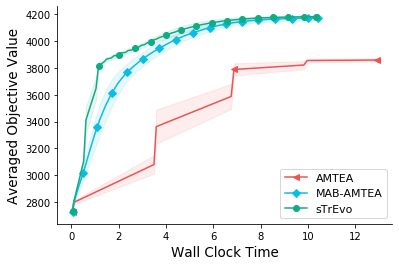

In [14]:
plt.figure()
plot_mean_std(conv_fitness_hist_transfer[None], SRC_COLORS[-2], 'AMTEA', SRC_SHAPES[-2], conv_fitness_time_transfer[:], std=True, data_std=conv_std_fitness_hist_transfer)
plot_mean_std(conv_fitness_hist_bandit[None], SRC_COLORS[-1], 'MAB-AMTEA', SRC_SHAPES[-1], conv_fitness_time_bandit[:], std=True, data_std=conv_std_fitness_hist_bandit)
plot_mean_std(conv_fitness_hist_cc[None], TARGET_COLOR, 'sTrEvo', TARGET_SHAPE, conv_fitness_time_cc[:], std=True, data_std=conv_std_fitness_hist_cc)
# plt.vlines(con_converge_times.mean(), multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max(), linestyles='dashed')
design_plot()
# plt.legend(loc='best')
save_plot('plots/knapsack/A/kp1000-250-related-time.pdf')
# plt.ylim(multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max() + 50)
# plt.xticks(list(range(0,81, 20)) + [con_converge_times.mean()] + list(range(120,161, 20)))
# plt.savefig('plots/average_AMTEA.jpg')

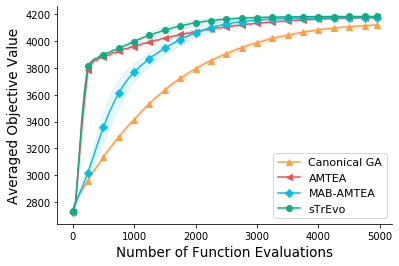

In [15]:
plt.figure()

plot_mean_std(fitness_ea_knapsack[:, :], SRC_COLORS[-3], 'Canonical GA', SRC_SHAPES[-3], std=True, x_interval=50)
plot_mean_std(fitness_hist_transfer[:, :], SRC_COLORS[-2], 'AMTEA', SRC_SHAPES[-2], std=True, x_interval=50)
plot_mean_std(fitness_hist_bandit[:, :], SRC_COLORS[-1], 'MAB-AMTEA', SRC_SHAPES[-1], std=True, x_interval=50)
plot_mean_std(fitness_hist_cc[:, :], TARGET_COLOR, 'sTrEvo', TARGET_SHAPE, std=True, x_interval=50)
# plt.vlines(con_converge_times.mean(), multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max(), linestyles='dashed')
design_plot('f')
save_plot('plots/knapsack/A/kp1000-250-related-generation.pdf')
# plt.ylim(multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max() + 50)
# plt.xticks(list(range(0,81, 20)) + [con_converge_times.mean()] + list(range(120,161, 20)))
# plt.savefig('plots/average_AMTEA.jpg')

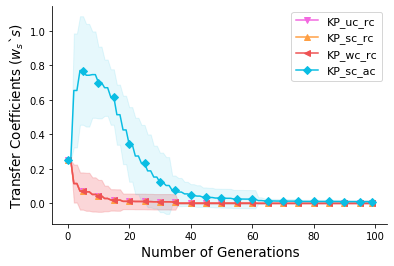

In [16]:
c = to_right_gen(np.array(genes_list_cc))
plt.figure()

plot_mean_std(c[:, :,0:250].sum(2)/c.sum(axis=2), SRC_COLORS[-4], 'KP_uc_rc', SRC_SHAPES[-4])
plot_mean_std(c[:, :,500:750].sum(2)/c.sum(axis=2), SRC_COLORS[-3], 'KP_sc_rc', SRC_SHAPES[-3])
plot_mean_std(c[:, :,250:500].sum(2)/c.sum(axis=2), SRC_COLORS[-2], 'KP_wc_rc', SRC_SHAPES[-2])
plot_mean_std(c[:, :,750:1000].sum(2)/c.sum(axis=2), SRC_COLORS[-1], 'KP_sc_ac', SRC_SHAPES[-1])
# plot_mean_std(c[:, :,1000]/c.sum(axis=2), TARGET_COLOR, "KP_uc_ac (Target)", TARGET_SHAPE)
plt.yticks([0, .2, .4, .6, .8, 1.])

design_plot(x_label='g', y_label='c')

save_plot('plots/knapsack/A/kp1000-250-related-cc-learning.pdf')

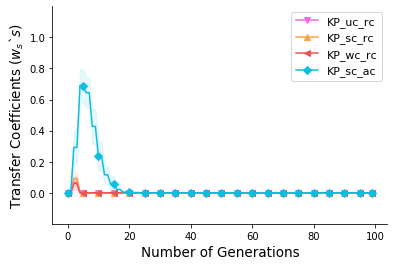

In [17]:
c = to_right_gen(np.array(alpha_transfer))
plt.figure()

plot_mean_std(c[:, :,0:250].sum(2)/c.sum(axis=2), SRC_COLORS[-4], 'KP_uc_rc', SRC_SHAPES[-4])
plot_mean_std(c[:, :,500:750].sum(2)/c.sum(axis=2), SRC_COLORS[-3], 'KP_sc_rc', SRC_SHAPES[-3])
plot_mean_std(c[:, :,250:500].sum(2)/c.sum(axis=2), SRC_COLORS[-2], 'KP_wc_rc', SRC_SHAPES[-2])
plot_mean_std(c[:, :,750:1000].sum(2)/c.sum(axis=2), SRC_COLORS[-1], 'KP_sc_ac', SRC_SHAPES[-1])
# plot_mean_std(c[:, :,1000]/c.sum(axis=2), TARGET_COLOR, "KP_uc_ac (Target)", TARGET_SHAPE)

design_plot(y_label='c', x_label='g')
# plt.legend(loc='lower right')
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
save_plot('plots/knapsack/A/kp1000-250-related-transfer-learning.pdf')

# 40 Related Source Tasks

In [3]:
class args:
    src_version = 'kp1000-40-a'
    stop_condition = True
    sample_size=50
    time_limits = None
    reps = 30
    transfer = True
    version = 'to'
    delta = 2
    buildmodel = False
    psize = 50
    save_path = 'results/main_multi_transfer_knapsack_kp1000-40-a_50s_1iter'
    efficient = False
    gen = 100

In [4]:
start = time()
fitness_hist_transfer, alpha_transfer, fitness_time_transfer = main_transfer(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_transfer_knapsack_kp1000-40-a_50s_1iter', [fitness_hist_transfer, alpha_transfer, fitness_time_transfer])

All source problems & target problems are loaded: length = 1000
-------------------- rep: 0 -------------------
Generation 0 best fitness = 2921.000000
Generation 1 best fitness = 2995.000000
0
Mixture coefficients: [0.00098514 0.00107911 0.00060842 ... 0.00152487 0.00129285 0.1674078 ]
Generation 2 best fitness = 3751.000000
Generation 3 best fitness = 3751.000000
0
Mixture coefficients: [0.0009655  0.0010034  0.00092326 ... 0.00034753 0.00139141 0.12258836]
Generation 4 best fitness = 3902.000000
Generation 5 best fitness = 3902.000000
0
Mixture coefficients: [0.00021263 0.00038914 0.00141948 ... 0.00036367 0.00103713 0.10921854]
Generation 6 best fitness = 3902.000000
Generation 7 best fitness = 3902.000000
0
Mixture coefficients: [0.00104424 0.00093475 0.00019171 ... 0.00136928 0.00133822 0.1457071 ]
Generation 8 best fitness = 3902.000000
Generation 9 best fitness = 3928.000000
0
Mixture coefficients: [0.00131643 0.00079955 0.00092455 ... 0.00082924 0.00119093 0.12181183]
Generati

0
Mixture coefficients: [3.97606933e-05 1.28785033e-03 1.32303000e-03 ... 1.34436023e-03
 1.53773182e-03 1.64176672e-01]
Generation 88 best fitness = 4160.000000
Generation 89 best fitness = 4168.000000
0
Mixture coefficients: [3.89294013e-05 8.16010186e-04 3.68064977e-04 ... 1.60791628e-03
 1.41802100e-03 1.70176407e-01]
Generation 90 best fitness = 4168.000000
Generation 91 best fitness = 4173.000000
0
Mixture coefficients: [0.00154539 0.00159151 0.00099934 ... 0.00140929 0.0008983  0.16148374]
Generation 92 best fitness = 4173.000000
Generation 93 best fitness = 4173.000000
0
Mixture coefficients: [8.52343922e-04 3.50009342e-04 1.40645196e-03 ... 7.64420415e-05
 1.61275292e-03 1.67531643e-01]
Generation 94 best fitness = 4173.000000
Generation 95 best fitness = 4173.000000
0
Mixture coefficients: [0.00137918 0.00059338 0.00017515 ... 0.00165378 0.00055965 0.16751006]
Generation 96 best fitness = 4173.000000
Generation 97 best fitness = 4173.000000
0
Mixture coefficients: [0.00111178

0
Mixture coefficients: [4.23511055e-06 5.99486175e-04 9.40837016e-04 ... 1.25805028e-03
 8.91724835e-04 1.78394151e-01]
Generation 76 best fitness = 4146.000000
Generation 77 best fitness = 4154.000000
0
Mixture coefficients: [1.56816546e-04 3.84016950e-04 3.94532551e-04 ... 1.35492484e-03
 5.15093430e-04 1.66871775e-01]
Generation 78 best fitness = 4154.000000
Generation 79 best fitness = 4154.000000
0
Mixture coefficients: [1.66129717e-03 2.44867633e-04 8.13800682e-05 ... 9.32505258e-04
 9.12111455e-05 1.67521050e-01]
Generation 80 best fitness = 4154.000000
Generation 81 best fitness = 4158.000000
0
Mixture coefficients: [0.0005789  0.00050051 0.00046334 ... 0.00041419 0.00087481 0.17522985]
Generation 82 best fitness = 4158.000000
Generation 83 best fitness = 4158.000000
0
Mixture coefficients: [0.00128802 0.00052924 0.00078776 ... 0.00144412 0.00145605 0.16598865]
Generation 84 best fitness = 4158.000000
Generation 85 best fitness = 4161.000000
0
Mixture coefficients: [0.00087423

0
Mixture coefficients: [0.00120462 0.00043337 0.00131913 ... 0.00034358 0.00058304 0.16703197]
Generation 64 best fitness = 4128.000000
Generation 65 best fitness = 4133.000000
0
Mixture coefficients: [1.02163016e-03 2.15964645e-04 7.11419053e-05 ... 4.85127490e-04
 1.62910866e-03 1.70168811e-01]
Generation 66 best fitness = 4133.000000
Generation 67 best fitness = 4133.000000
0
Mixture coefficients: [1.48366813e-03 5.03162653e-04 1.35072297e-03 ... 1.39310037e-05
 1.25148530e-03 1.67121309e-01]
Generation 68 best fitness = 4133.000000
Generation 69 best fitness = 4135.000000
0
Mixture coefficients: [3.20012251e-04 9.29966164e-06 7.82479087e-05 ... 2.97518061e-06
 6.42174198e-04 1.62862119e-01]
Generation 70 best fitness = 4135.000000
Generation 71 best fitness = 4140.000000
0
Mixture coefficients: [1.11554903e-03 6.93885956e-05 1.57002739e-03 ... 1.28188489e-03
 1.64995250e-04 1.71784897e-01]
Generation 72 best fitness = 4140.000000
Generation 73 best fitness = 4151.000000
0
Mixture 

0
Mixture coefficients: [0.00053326 0.00164782 0.00085015 ... 0.00091727 0.00102382 0.16658532]
Generation 52 best fitness = 4096.000000
Generation 53 best fitness = 4100.000000
0
Mixture coefficients: [0.0008397  0.00149408 0.00037585 ... 0.00166855 0.00038477 0.16817154]
Generation 54 best fitness = 4100.000000
Generation 55 best fitness = 4104.000000
0
Mixture coefficients: [0.00143189 0.00072363 0.00108032 ... 0.00124419 0.00110691 0.1638326 ]
Generation 56 best fitness = 4104.000000
Generation 57 best fitness = 4110.000000
0
Mixture coefficients: [1.54488426e-03 1.58327913e-03 1.20163571e-03 ... 1.15331401e-04
 1.40738527e-03 1.70989820e-01]
Generation 58 best fitness = 4119.000000
Generation 59 best fitness = 4119.000000
0
Mixture coefficients: [8.39212995e-04 1.41652848e-04 1.17481077e-03 ... 1.22620789e-03
 6.35455963e-05 1.66584247e-01]
Generation 60 best fitness = 4119.000000
Generation 61 best fitness = 4125.000000
0
Mixture coefficients: [9.11660759e-04 1.18495926e-03 4.161

0
Mixture coefficients: [0.00063813 0.00154494 0.00104994 ... 0.00105491 0.00017772 0.16403543]
Generation 40 best fitness = 4061.000000
Generation 41 best fitness = 4063.000000
0
Mixture coefficients: [8.54179874e-04 1.21939849e-03 3.03951012e-05 ... 1.41185150e-03
 3.83413530e-04 1.68341014e-01]
Generation 42 best fitness = 4063.000000
Generation 43 best fitness = 4091.000000
0
Mixture coefficients: [0.00149993 0.00144965 0.0001867  ... 0.00102648 0.00060409 0.16798783]
Generation 44 best fitness = 4091.000000
Generation 45 best fitness = 4107.000000
0
Mixture coefficients: [0.00167843 0.00033038 0.00154681 ... 0.00122844 0.00154881 0.17003713]
Generation 46 best fitness = 4107.000000
Generation 47 best fitness = 4107.000000
0
Mixture coefficients: [0.00109895 0.00132502 0.00067141 ... 0.00089867 0.00072145 0.1654412 ]
Generation 48 best fitness = 4107.000000
Generation 49 best fitness = 4111.000000
0
Mixture coefficients: [6.44766070e-04 1.15940599e-03 4.49536972e-04 ... 5.62996616e

0
Mixture coefficients: [0.0014071  0.0015988  0.00101392 ... 0.00462776 0.00019386 0.16067094]
Generation 28 best fitness = 3951.000000
Generation 29 best fitness = 3956.000000
0
Mixture coefficients: [0.00123576 0.00105596 0.00147339 ... 0.00160695 0.00039874 0.16780918]
Generation 30 best fitness = 3956.000000
Generation 31 best fitness = 3977.000000
0
Mixture coefficients: [0.00032623 0.00039137 0.00112636 ... 0.00165299 0.00140516 0.16832041]
Generation 32 best fitness = 3977.000000
Generation 33 best fitness = 3991.000000
0
Mixture coefficients: [9.37892174e-04 1.29935942e-03 6.48927401e-04 ... 1.24904058e-03
 1.08682046e-04 1.66282540e-01]
Generation 34 best fitness = 3991.000000
Generation 35 best fitness = 4005.000000
0
Mixture coefficients: [0.00161219 0.00021028 0.00047367 ... 0.0011328  0.00099105 0.16604934]
Generation 36 best fitness = 4005.000000
Generation 37 best fitness = 4005.000000
0
Mixture coefficients: [3.75590672e-04 4.04105364e-04 5.69294543e-04 ... 7.49504761e

0
Mixture coefficients: [8.28794917e-05 1.51297518e-03 7.23647197e-04 ... 1.39315557e-03
 6.68151968e-04 9.65705650e-02]
Generation 16 best fitness = 3910.000000
Generation 17 best fitness = 3910.000000
0
Mixture coefficients: [8.25509057e-05 1.45702782e-03 4.55380477e-04 ... 9.95313186e-04
 1.26829166e-04 1.34613499e-01]
Generation 18 best fitness = 3910.000000
Generation 19 best fitness = 3933.000000
0
Mixture coefficients: [5.81102310e-04 1.12988768e-04 5.38084623e-04 ... 7.27543095e-04
 1.18411416e-03 1.53065087e-01]
Generation 20 best fitness = 3933.000000
Generation 21 best fitness = 3939.000000
0
Mixture coefficients: [4.09813821e-04 6.23762976e-04 9.69340750e-05 ... 8.02424204e-03
 1.21595953e-03 1.53385680e-01]
Generation 22 best fitness = 3939.000000
Generation 23 best fitness = 3978.000000
0
Mixture coefficients: [0.00099466 0.00075645 0.00114571 ... 0.00462184 0.00029551 0.16752263]
Generation 24 best fitness = 3978.000000
Generation 25 best fitness = 3978.000000
0
Mixture 

0
Mixture coefficients: [0.0014896  0.00104026 0.00149217 ... 0.00073531 0.00066129 0.08783892]
Generation 4 best fitness = 3885.000000
Generation 5 best fitness = 3885.000000
0
Mixture coefficients: [0.00122078 0.00054572 0.00068844 ... 0.00117311 0.00086543 0.10737629]
Generation 6 best fitness = 3923.000000
Generation 7 best fitness = 3923.000000
0
Mixture coefficients: [0.00022648 0.00147913 0.00093992 ... 0.00073693 0.00122501 0.12416867]
Generation 8 best fitness = 3923.000000
Generation 9 best fitness = 3923.000000
0
Mixture coefficients: [0.00028264 0.00060256 0.00041472 ... 0.00116066 0.00060499 0.12985111]
Generation 10 best fitness = 3923.000000
Generation 11 best fitness = 3923.000000
0
Mixture coefficients: [0.00126947 0.00087639 0.00042912 ... 0.00028962 0.00158041 0.11741567]
Generation 12 best fitness = 3923.000000
Generation 13 best fitness = 3923.000000
0
Mixture coefficients: [0.00071697 0.00012438 0.00160795 ... 0.00149341 0.00101186 0.11113623]
Generation 14 best f

0
Mixture coefficients: [0.00059115 0.00162274 0.00106686 ... 0.00016847 0.00021539 0.16753529]
Generation 94 best fitness = 4169.000000
Generation 95 best fitness = 4170.000000
0
Mixture coefficients: [0.00053614 0.0014811  0.00090785 ... 0.00149699 0.00103466 0.16777171]
Generation 96 best fitness = 4170.000000
Generation 97 best fitness = 4170.000000
0
Mixture coefficients: [9.09242395e-05 1.34047115e-03 9.20385379e-04 ... 1.04742774e-04
 1.25562439e-03 1.66914152e-01]
Generation 98 best fitness = 4170.000000
Generation 99 best fitness = 4175.000000
-------------------- rep: 8 -------------------
Generation 0 best fitness = 2900.000000
Generation 1 best fitness = 2900.000000
0
Mixture coefficients: [0.00142195 0.00062455 0.00053323 ... 0.00104525 0.00063387 0.16473465]
Generation 2 best fitness = 2919.000000
Generation 3 best fitness = 2937.000000
0
Mixture coefficients: [0.00156392 0.00035966 0.00155215 ... 0.00079982 0.00133489 0.11826163]
Generation 4 best fitness = 3835.000000
G

0
Mixture coefficients: [0.0012613  0.00159699 0.00063977 ... 0.00039477 0.00163095 0.16876482]
Generation 84 best fitness = 4169.000000
Generation 85 best fitness = 4169.000000
0
Mixture coefficients: [0.00132685 0.00040634 0.00110736 ... 0.0002604  0.0011939  0.16186534]
Generation 86 best fitness = 4169.000000
Generation 87 best fitness = 4169.000000
0
Mixture coefficients: [7.40332032e-04 9.81629961e-05 1.63308808e-03 ... 1.60202310e-03
 5.01399277e-04 1.63960231e-01]
Generation 88 best fitness = 4169.000000
Generation 89 best fitness = 4169.000000
0
Mixture coefficients: [0.00081495 0.00016742 0.00087602 ... 0.00029071 0.00099761 0.16356693]
Generation 90 best fitness = 4169.000000
Generation 91 best fitness = 4170.000000
0
Mixture coefficients: [1.48634721e-03 9.24903129e-04 1.34727461e-04 ... 1.56869504e-04
 1.57054244e-03 1.64625184e-01]
Generation 92 best fitness = 4170.000000
Generation 93 best fitness = 4170.000000
0
Mixture coefficients: [0.00118883 0.00040254 0.00079142 ..

0
Mixture coefficients: [1.31627299e-03 4.23410256e-05 7.55298423e-04 ... 1.15643437e-03
 1.12290491e-03 1.69889488e-01]
Generation 72 best fitness = 4141.000000
Generation 73 best fitness = 4141.000000
0
Mixture coefficients: [0.00022534 0.00059922 0.00108525 ... 0.0004862  0.00091917 0.17186224]
Generation 74 best fitness = 4141.000000
Generation 75 best fitness = 4147.000000
0
Mixture coefficients: [0.00163023 0.00069246 0.00083382 ... 0.00143772 0.00070326 0.16499525]
Generation 76 best fitness = 4147.000000
Generation 77 best fitness = 4147.000000
0
Mixture coefficients: [0.00109736 0.00142951 0.00113433 ... 0.00099702 0.00123758 0.16804128]
Generation 78 best fitness = 4147.000000
Generation 79 best fitness = 4154.000000
0
Mixture coefficients: [0.00077332 0.00086756 0.00099143 ... 0.00066471 0.00058494 0.17151059]
Generation 80 best fitness = 4154.000000
Generation 81 best fitness = 4154.000000
0
Mixture coefficients: [5.16738564e-04 1.41515364e-03 8.25714145e-04 ... 3.26543108e

0
Mixture coefficients: [1.12347789e-03 1.43220449e-03 5.11890935e-05 ... 8.61397067e-04
 7.40113943e-04 1.67088312e-01]
Generation 60 best fitness = 4124.000000
Generation 61 best fitness = 4128.000000
0
Mixture coefficients: [0.00026084 0.00148639 0.00085715 ... 0.00102906 0.00099085 0.17265805]
Generation 62 best fitness = 4128.000000
Generation 63 best fitness = 4134.000000
0
Mixture coefficients: [0.00043059 0.00027097 0.00056716 ... 0.00097559 0.00079305 0.16311317]
Generation 64 best fitness = 4134.000000
Generation 65 best fitness = 4146.000000
0
Mixture coefficients: [0.00158222 0.00065286 0.00120065 ... 0.0008568  0.00154622 0.16888641]
Generation 66 best fitness = 4146.000000
Generation 67 best fitness = 4153.000000
0
Mixture coefficients: [0.00142733 0.00148906 0.00120635 ... 0.00060511 0.00049474 0.17036005]
Generation 68 best fitness = 4153.000000
Generation 69 best fitness = 4153.000000
0
Mixture coefficients: [8.83193027e-04 1.39770790e-03 5.02883846e-04 ... 1.42550800e

0
Mixture coefficients: [1.00967101e-03 1.84095628e-05 1.09782101e-03 ... 1.30330335e-03
 7.59814538e-04 1.63210077e-01]
Generation 50 best fitness = 4095.000000
Generation 51 best fitness = 4102.000000
0
Mixture coefficients: [8.29212690e-04 8.95264289e-04 7.77234287e-04 ... 1.75099472e-05
 1.13646717e-03 1.66336304e-01]
Generation 52 best fitness = 4102.000000
Generation 53 best fitness = 4114.000000
0
Mixture coefficients: [0.00150209 0.00108519 0.00090663 ... 0.00141003 0.00044549 0.16499879]
Generation 54 best fitness = 4114.000000
Generation 55 best fitness = 4114.000000
0
Mixture coefficients: [1.04191552e-03 1.08363452e-03 3.26507110e-04 ... 1.08127480e-03
 8.48743207e-06 1.64603640e-01]
Generation 56 best fitness = 4114.000000
Generation 57 best fitness = 4116.000000
0
Mixture coefficients: [1.96021252e-06 8.29473548e-04 1.19995565e-03 ... 1.58107251e-03
 1.06090703e-03 1.65862910e-01]
Generation 58 best fitness = 4116.000000
Generation 59 best fitness = 4126.000000
0
Mixture 

0
Mixture coefficients: [0.00034207 0.00031453 0.00026147 ... 0.0012093  0.0007265  0.16884334]
Generation 36 best fitness = 4039.000000
Generation 37 best fitness = 4039.000000
0
Mixture coefficients: [1.39157972e-03 1.04303923e-03 1.29747180e-03 ... 8.64120760e-06
 9.44687405e-04 1.69070937e-01]
Generation 38 best fitness = 4039.000000
Generation 39 best fitness = 4058.000000
0
Mixture coefficients: [1.26046653e-04 1.24209653e-03 2.09444531e-05 ... 5.65130323e-04
 1.09186368e-03 1.72603980e-01]
Generation 40 best fitness = 4058.000000
Generation 41 best fitness = 4070.000000
0
Mixture coefficients: [1.40138000e-03 4.97147321e-04 5.85210628e-05 ... 1.63381659e-03
 6.94341513e-04 1.69817769e-01]
Generation 42 best fitness = 4070.000000
Generation 43 best fitness = 4070.000000
0
Mixture coefficients: [1.46288143e-04 6.29754820e-04 1.30163379e-03 ... 8.36883264e-04
 4.98244330e-04 1.65208846e-01]
Generation 44 best fitness = 4070.000000
Generation 45 best fitness = 4081.000000
0
Mixture 

0
Mixture coefficients: [0.00090221 0.00124413 0.00070319 ... 0.00158537 0.00042646 0.15828112]
Generation 24 best fitness = 3973.000000
Generation 25 best fitness = 3973.000000
0
Mixture coefficients: [0.00084761 0.00131408 0.00168323 ... 0.00068702 0.00169904 0.17236218]
Generation 26 best fitness = 3973.000000
Generation 27 best fitness = 3983.000000
0
Mixture coefficients: [1.65690071e-04 1.19379356e-03 9.20964928e-06 ... 1.09525455e-03
 3.44120539e-04 1.70800213e-01]
Generation 28 best fitness = 3983.000000
Generation 29 best fitness = 4008.000000
0
Mixture coefficients: [0.00140881 0.00022215 0.00027805 ... 0.00044579 0.000457   0.16374883]
Generation 30 best fitness = 4008.000000
Generation 31 best fitness = 4020.000000
0
Mixture coefficients: [0.00082219 0.00049568 0.00036035 ... 0.00148304 0.00026965 0.16698453]
Generation 32 best fitness = 4020.000000
Generation 33 best fitness = 4028.000000
0
Mixture coefficients: [1.47783215e-03 4.31347151e-05 1.60828775e-03 ... 1.20437791e

Generation 13 best fitness = 3896.000000
0
Mixture coefficients: [0.00110957 0.00044239 0.00051944 ... 0.00765753 0.00036038 0.11579209]
Generation 14 best fitness = 3896.000000
Generation 15 best fitness = 3940.000000
0
Mixture coefficients: [0.00115563 0.00119534 0.00064365 ... 0.00414361 0.00143128 0.13744387]
Generation 16 best fitness = 3940.000000
Generation 17 best fitness = 3940.000000
0
Mixture coefficients: [1.12785801e-03 4.73833796e-05 6.26344712e-04 ... 7.32580669e-03
 1.65823348e-03 1.44685096e-01]
Generation 18 best fitness = 3940.000000
Generation 19 best fitness = 3955.000000
0
Mixture coefficients: [0.00084595 0.00091882 0.00090641 ... 0.00352375 0.00164387 0.16882899]
Generation 20 best fitness = 3955.000000
Generation 21 best fitness = 3962.000000
0
Mixture coefficients: [0.0008755  0.00070982 0.00138287 ... 0.00813881 0.00143293 0.16217298]
Generation 22 best fitness = 3962.000000
Generation 23 best fitness = 3962.000000
0
Mixture coefficients: [0.0012509  0.000598

0
Mixture coefficients: [4.80512781e-04 5.61667633e-05 5.47201979e-04 ... 1.59636488e-03
 1.06846400e-03 1.11084367e-01]
Generation 4 best fitness = 3909.000000
Generation 5 best fitness = 3909.000000
0
Mixture coefficients: [6.50953893e-05 7.53198255e-04 1.30003458e-03 ... 3.97440283e-04
 4.65863046e-03 1.10576862e-01]
Generation 6 best fitness = 3909.000000
Generation 7 best fitness = 3909.000000
0
Mixture coefficients: [0.0002134  0.00066542 0.00052993 ... 0.0001786  0.00828447 0.13423007]
Generation 8 best fitness = 3909.000000
Generation 9 best fitness = 3909.000000
0
Mixture coefficients: [0.00143664 0.00047539 0.00109115 ... 0.00025546 0.01155883 0.11721356]
Generation 10 best fitness = 3909.000000
Generation 11 best fitness = 3909.000000
0
Mixture coefficients: [0.00139444 0.0013465  0.00159514 ... 0.001623   0.01412605 0.08261252]
Generation 12 best fitness = 3909.000000
Generation 13 best fitness = 3956.000000
0
Mixture coefficients: [0.00105686 0.00146966 0.00145127 ... 0.00

Generation 91 best fitness = 4175.000000
0
Mixture coefficients: [6.88792550e-04 1.57256794e-04 1.13206247e-03 ... 2.15335383e-04
 7.04443478e-05 1.64957385e-01]
Generation 92 best fitness = 4175.000000
Generation 93 best fitness = 4175.000000
0
Mixture coefficients: [0.00105984 0.00088434 0.00016612 ... 0.00059233 0.00158988 0.16484549]
Generation 94 best fitness = 4175.000000
Generation 95 best fitness = 4175.000000
0
Mixture coefficients: [0.00085928 0.00156488 0.00044229 ... 0.00029911 0.0012246  0.16636521]
Generation 96 best fitness = 4175.000000
Generation 97 best fitness = 4175.000000
0
Mixture coefficients: [0.00166222 0.00071662 0.00096463 ... 0.00075661 0.00039499 0.17258026]
Generation 98 best fitness = 4175.000000
Generation 99 best fitness = 4175.000000
-------------------- rep: 16 -------------------
Generation 0 best fitness = 2863.000000
Generation 1 best fitness = 2895.000000
0
Mixture coefficients: [8.56420692e-04 9.26600521e-04 2.55866010e-04 ... 3.64943604e-05
 7.1

Generation 81 best fitness = 4166.000000
0
Mixture coefficients: [9.50452462e-04 1.23948484e-03 1.23477409e-03 ... 1.24184161e-03
 1.54906812e-04 1.68164575e-01]
Generation 82 best fitness = 4166.000000
Generation 83 best fitness = 4168.000000
0
Mixture coefficients: [0.00053564 0.00061102 0.00036851 ... 0.00047997 0.00085775 0.16682183]
Generation 84 best fitness = 4168.000000
Generation 85 best fitness = 4170.000000
0
Mixture coefficients: [0.00120588 0.00159481 0.0006818  ... 0.00050226 0.00130291 0.1674616 ]
Generation 86 best fitness = 4170.000000
Generation 87 best fitness = 4171.000000
0
Mixture coefficients: [0.00095042 0.00159209 0.00134966 ... 0.00112201 0.00163085 0.16546591]
Generation 88 best fitness = 4171.000000
Generation 89 best fitness = 4172.000000
0
Mixture coefficients: [2.96227823e-04 1.33015655e-03 4.60903018e-04 ... 6.79111438e-05
 5.83533100e-04 1.69606441e-01]
Generation 90 best fitness = 4172.000000
Generation 91 best fitness = 4176.000000
0
Mixture coefficie

Generation 69 best fitness = 4146.000000
0
Mixture coefficients: [0.00140725 0.00098411 0.00087132 ... 0.00077933 0.00025825 0.16189182]
Generation 70 best fitness = 4146.000000
Generation 71 best fitness = 4146.000000
0
Mixture coefficients: [3.89937803e-04 1.02796329e-03 3.13024678e-04 ... 4.81962042e-05
 9.95502847e-04 1.63573720e-01]
Generation 72 best fitness = 4146.000000
Generation 73 best fitness = 4150.000000
0
Mixture coefficients: [2.24318250e-04 1.22618256e-03 4.55732872e-04 ... 5.19291946e-06
 9.38956252e-04 1.67345037e-01]
Generation 74 best fitness = 4150.000000
Generation 75 best fitness = 4154.000000
0
Mixture coefficients: [2.26344585e-04 1.14818736e-03 9.44898610e-05 ... 1.20906181e-03
 9.82078247e-04 1.69792068e-01]
Generation 76 best fitness = 4154.000000
Generation 77 best fitness = 4155.000000
0
Mixture coefficients: [6.22735991e-04 8.78125071e-04 6.19337311e-04 ... 6.05977925e-05
 1.44175716e-03 1.66951206e-01]
Generation 78 best fitness = 4155.000000
Generation

0
Mixture coefficients: [7.70538880e-04 4.01958885e-04 5.16275366e-04 ... 1.06887103e-03
 1.45532808e-04 1.69095929e-01]
Generation 56 best fitness = 4095.000000
Generation 57 best fitness = 4116.000000
0
Mixture coefficients: [1.49009305e-03 4.80683553e-05 1.14720961e-03 ... 4.85584387e-04
 8.79084619e-04 1.65651467e-01]
Generation 58 best fitness = 4116.000000
Generation 59 best fitness = 4120.000000
0
Mixture coefficients: [3.15770120e-05 1.05618667e-03 8.66957037e-04 ... 5.08286915e-04
 4.82002426e-04 1.64514867e-01]
Generation 60 best fitness = 4120.000000
Generation 61 best fitness = 4128.000000
0
Mixture coefficients: [0.00121085 0.00110743 0.00125835 ... 0.00127132 0.00122857 0.16638787]
Generation 62 best fitness = 4128.000000
Generation 63 best fitness = 4131.000000
0
Mixture coefficients: [0.00028338 0.0016619  0.00128787 ... 0.00125871 0.0010321  0.17145626]
Generation 64 best fitness = 4131.000000
Generation 65 best fitness = 4131.000000
0
Mixture coefficients: [1.62608046

0
Mixture coefficients: [0.00067329 0.00158043 0.00020506 ... 0.00140501 0.0002839  0.16782218]
Generation 44 best fitness = 4074.000000
Generation 45 best fitness = 4087.000000
0
Mixture coefficients: [1.46503554e-03 8.34308147e-04 1.17727738e-04 ... 1.62021461e-03
 5.69965879e-04 1.64157888e-01]
Generation 46 best fitness = 4087.000000
Generation 47 best fitness = 4102.000000
0
Mixture coefficients: [0.00036818 0.00135575 0.00039778 ... 0.00048995 0.00156308 0.17035445]
Generation 48 best fitness = 4102.000000
Generation 49 best fitness = 4108.000000
0
Mixture coefficients: [1.42356287e-03 7.60438687e-04 1.56229198e-04 ... 9.31802709e-05
 9.25159273e-04 1.69182106e-01]
Generation 50 best fitness = 4108.000000
Generation 51 best fitness = 4112.000000
0
Mixture coefficients: [5.03337193e-04 1.26190998e-03 1.67334771e-03 ... 1.55312707e-04
 2.07258967e-04 1.69988231e-01]
Generation 52 best fitness = 4112.000000
Generation 53 best fitness = 4113.000000
0
Mixture coefficients: [0.00041668

0
Mixture coefficients: [0.00143984 0.00131101 0.00121689 ... 0.00027431 0.00112253 0.16545265]
Generation 32 best fitness = 3988.000000
Generation 33 best fitness = 4016.000000
0
Mixture coefficients: [0.00141496 0.00090623 0.00089709 ... 0.00059499 0.00131023 0.16429026]
Generation 34 best fitness = 4016.000000
Generation 35 best fitness = 4016.000000
0
Mixture coefficients: [1.55041467e-03 5.53123572e-05 4.88845907e-05 ... 9.99299103e-04
 1.37453254e-03 1.70712365e-01]
Generation 36 best fitness = 4016.000000
Generation 37 best fitness = 4019.000000
0
Mixture coefficients: [1.13243281e-03 9.61077886e-04 9.34572617e-05 ... 1.12559352e-04
 3.53719248e-04 1.64271917e-01]
Generation 38 best fitness = 4019.000000
Generation 39 best fitness = 4025.000000
0
Mixture coefficients: [1.23605859e-03 4.54216734e-05 7.14873039e-04 ... 1.66305192e-03
 1.55522637e-03 1.68182727e-01]
Generation 40 best fitness = 4025.000000
Generation 41 best fitness = 4052.000000
0
Mixture coefficients: [0.00135951

0
Mixture coefficients: [0.00121027 0.00039127 0.00140302 ... 0.00451011 0.00113603 0.1274611 ]
Generation 20 best fitness = 3943.000000
Generation 21 best fitness = 3953.000000
0
Mixture coefficients: [0.00024397 0.00025534 0.00161554 ... 0.00024461 0.00087097 0.1479212 ]
Generation 22 best fitness = 3953.000000
Generation 23 best fitness = 3966.000000
0
Mixture coefficients: [0.00165694 0.00116398 0.00128874 ... 0.0009682  0.00132388 0.154002  ]
Generation 24 best fitness = 3966.000000
Generation 25 best fitness = 3973.000000
0
Mixture coefficients: [0.00052599 0.00151499 0.00023141 ... 0.00065879 0.00154051 0.16427968]
Generation 26 best fitness = 3973.000000
Generation 27 best fitness = 3981.000000
0
Mixture coefficients: [0.00109341 0.00167981 0.00147978 ... 0.00115547 0.00115188 0.17105395]
Generation 28 best fitness = 3981.000000
Generation 29 best fitness = 3996.000000
0
Mixture coefficients: [0.00095499 0.00050183 0.00115195 ... 0.00158328 0.00020399 0.16581341]
Generation 30 

0
Mixture coefficients: [0.00155948 0.00030428 0.00087298 ... 0.00124853 0.00064391 0.12764576]
Generation 10 best fitness = 3907.000000
Generation 11 best fitness = 3907.000000
0
Mixture coefficients: [0.00062117 0.00104152 0.00050324 ... 0.00082977 0.00761532 0.1081352 ]
Generation 12 best fitness = 3907.000000
Generation 13 best fitness = 3911.000000
0
Mixture coefficients: [0.00073995 0.0005221  0.0006892  ... 0.00141552 0.00705679 0.09603435]
Generation 14 best fitness = 3911.000000
Generation 15 best fitness = 3911.000000
0
Mixture coefficients: [0.00011476 0.00105307 0.00126777 ... 0.00143421 0.00590781 0.09968229]
Generation 16 best fitness = 3911.000000
Generation 17 best fitness = 3911.000000
0
Mixture coefficients: [0.00048437 0.00085892 0.00032564 ... 0.00127042 0.00335909 0.12053063]
Generation 18 best fitness = 3911.000000
Generation 19 best fitness = 3939.000000
0
Mixture coefficients: [2.40972392e-04 7.65952309e-05 5.17442356e-04 ... 1.25887079e-03
 5.74472098e-04 1.322

Generation 97 best fitness = 4177.000000
0
Mixture coefficients: [0.00043742 0.00090075 0.00123886 ... 0.00077608 0.00120583 0.16789336]
Generation 98 best fitness = 4177.000000
Generation 99 best fitness = 4177.000000
-------------------- rep: 23 -------------------
Generation 0 best fitness = 2924.000000
Generation 1 best fitness = 2925.000000
0
Mixture coefficients: [1.67649867e-03 9.96213425e-04 1.20361166e-03 ... 1.05704167e-03
 3.42867085e-05 1.66064040e-01]
Generation 2 best fitness = 3877.000000
Generation 3 best fitness = 3877.000000
0
Mixture coefficients: [0.00147854 0.0006362  0.00045576 ... 0.00054219 0.00032743 0.09569748]
Generation 4 best fitness = 3877.000000
Generation 5 best fitness = 3877.000000
0
Mixture coefficients: [9.37141973e-05 1.05597185e-03 5.29910447e-04 ... 5.67844455e-04
 4.70796260e-04 1.29054357e-01]
Generation 6 best fitness = 3877.000000
Generation 7 best fitness = 3877.000000
0
Mixture coefficients: [0.00019343 0.00084399 0.00060312 ... 0.00046861 0

Generation 87 best fitness = 4164.000000
0
Mixture coefficients: [0.00047854 0.00039254 0.00161033 ... 0.00063438 0.00138912 0.16558544]
Generation 88 best fitness = 4164.000000
Generation 89 best fitness = 4164.000000
0
Mixture coefficients: [1.61676553e-04 1.40161994e-03 1.50704091e-03 ... 7.13918484e-04
 7.17246755e-04 1.67853188e-01]
Generation 90 best fitness = 4164.000000
Generation 91 best fitness = 4169.000000
0
Mixture coefficients: [0.00136063 0.00165773 0.00043939 ... 0.0011012  0.00060887 0.16808201]
Generation 92 best fitness = 4169.000000
Generation 93 best fitness = 4170.000000
0
Mixture coefficients: [4.31208733e-04 1.04230317e-03 4.34229531e-04 ... 1.30264369e-04
 1.72859132e-06 1.69411796e-01]
Generation 94 best fitness = 4170.000000
Generation 95 best fitness = 4170.000000
0
Mixture coefficients: [8.44453952e-04 6.90907807e-04 8.04462217e-04 ... 4.80286616e-04
 1.24253296e-04 1.63177032e-01]
Generation 96 best fitness = 4170.000000
Generation 97 best fitness = 4175.0

Generation 75 best fitness = 4157.000000
0
Mixture coefficients: [0.0007741  0.00017056 0.00033646 ... 0.00151656 0.00039372 0.17028206]
Generation 76 best fitness = 4157.000000
Generation 77 best fitness = 4164.000000
0
Mixture coefficients: [0.00158118 0.00104602 0.00126643 ... 0.00038837 0.00100966 0.16918238]
Generation 78 best fitness = 4164.000000
Generation 79 best fitness = 4164.000000
0
Mixture coefficients: [8.41819738e-04 9.91197252e-04 5.54747123e-05 ... 4.88719880e-04
 8.95468262e-04 1.69461428e-01]
Generation 80 best fitness = 4164.000000
Generation 81 best fitness = 4166.000000
0
Mixture coefficients: [1.26647563e-03 5.95578068e-04 1.59200239e-03 ... 1.31404628e-04
 8.49538161e-04 1.69247955e-01]
Generation 82 best fitness = 4166.000000
Generation 83 best fitness = 4167.000000
0
Mixture coefficients: [1.06853318e-03 2.46553148e-04 9.24701485e-04 ... 1.12845944e-04
 1.02594551e-03 1.68278532e-01]
Generation 84 best fitness = 4167.000000
Generation 85 best fitness = 4172.0

Generation 65 best fitness = 4128.000000
0
Mixture coefficients: [1.42307193e-03 5.12092302e-04 9.89412739e-04 ... 3.45937148e-04
 7.96728284e-05 1.63760578e-01]
Generation 66 best fitness = 4128.000000
Generation 67 best fitness = 4128.000000
0
Mixture coefficients: [0.00074103 0.00043527 0.00141812 ... 0.00154909 0.00059826 0.16945759]
Generation 68 best fitness = 4128.000000
Generation 69 best fitness = 4138.000000
0
Mixture coefficients: [0.00098293 0.0007563  0.00159926 ... 0.00105875 0.00035449 0.16580039]
Generation 70 best fitness = 4138.000000
Generation 71 best fitness = 4142.000000
0
Mixture coefficients: [0.00082245 0.00101124 0.00125454 ... 0.00042463 0.00074814 0.16843296]
Generation 72 best fitness = 4142.000000
Generation 73 best fitness = 4142.000000
0
Mixture coefficients: [2.92722198e-04 3.41412731e-04 1.10945928e-03 ... 2.11217139e-05
 2.81585390e-04 1.64335008e-01]
Generation 74 best fitness = 4142.000000
Generation 75 best fitness = 4146.000000
0
Mixture coefficie

0
Mixture coefficients: [1.15713069e-03 1.03741725e-04 1.49301981e-03 ... 8.35848117e-04
 2.13667772e-04 1.69616861e-01]
Generation 54 best fitness = 4102.000000
Generation 55 best fitness = 4116.000000
0
Mixture coefficients: [1.55665938e-03 1.34909766e-03 1.41398355e-05 ... 6.83071937e-05
 1.08808232e-03 1.68069180e-01]
Generation 56 best fitness = 4116.000000
Generation 57 best fitness = 4122.000000
0
Mixture coefficients: [0.00064568 0.0012655  0.00146898 ... 0.00021452 0.00048975 0.16459108]
Generation 58 best fitness = 4122.000000
Generation 59 best fitness = 4122.000000
0
Mixture coefficients: [0.00148758 0.00050173 0.00027419 ... 0.00115392 0.00154415 0.16528548]
Generation 60 best fitness = 4122.000000
Generation 61 best fitness = 4127.000000
0
Mixture coefficients: [1.60431712e-03 1.46624625e-04 2.36624992e-05 ... 1.34718095e-03
 1.86941436e-05 1.67827457e-01]
Generation 62 best fitness = 4127.000000
Generation 63 best fitness = 4128.000000
0
Mixture coefficients: [1.50043560

Generation 43 best fitness = 4076.000000
0
Mixture coefficients: [0.00153163 0.00140623 0.00151255 ... 0.00044394 0.00058591 0.16677578]
Generation 44 best fitness = 4076.000000
Generation 45 best fitness = 4076.000000
0
Mixture coefficients: [0.00110543 0.00080359 0.00079456 ... 0.00161137 0.00070814 0.16712025]
Generation 46 best fitness = 4076.000000
Generation 47 best fitness = 4084.000000
0
Mixture coefficients: [0.00145267 0.00134203 0.00072219 ... 0.0005314  0.00033291 0.16777044]
Generation 48 best fitness = 4084.000000
Generation 49 best fitness = 4084.000000
0
Mixture coefficients: [1.31552287e-03 1.22189208e-03 6.35323142e-05 ... 1.36483182e-04
 4.80596745e-04 1.65708436e-01]
Generation 50 best fitness = 4084.000000
Generation 51 best fitness = 4098.000000
0
Mixture coefficients: [0.00093087 0.00130204 0.00020998 ... 0.00061278 0.00024327 0.16786843]
Generation 52 best fitness = 4098.000000
Generation 53 best fitness = 4100.000000
0
Mixture coefficients: [0.00129459 0.000921

Generation 33 best fitness = 4016.000000
0
Mixture coefficients: [7.89280259e-04 1.38138894e-03 9.98438164e-04 ... 6.58601404e-04
 1.54871390e-04 1.68203288e-01]
Generation 34 best fitness = 4016.000000
Generation 35 best fitness = 4027.000000
0
Mixture coefficients: [0.00087476 0.00070818 0.0004104  ... 0.00054515 0.00165057 0.16664538]
Generation 36 best fitness = 4027.000000
Generation 37 best fitness = 4045.000000
0
Mixture coefficients: [2.96658156e-04 8.15738510e-04 1.34192412e-04 ... 1.10292949e-03
 1.08889133e-04 1.66164634e-01]
Generation 38 best fitness = 4045.000000
Generation 39 best fitness = 4055.000000
0
Mixture coefficients: [0.00017926 0.00120147 0.00062337 ... 0.00021634 0.00130102 0.16992821]
Generation 40 best fitness = 4055.000000
Generation 41 best fitness = 4055.000000
0
Mixture coefficients: [1.05277941e-03 5.74753647e-04 6.95372289e-04 ... 3.00099841e-05
 1.07183709e-03 1.65783167e-01]
Generation 42 best fitness = 4055.000000
Generation 43 best fitness = 4067.0

Generation 21 best fitness = 3924.000000
0
Mixture coefficients: [0.00080408 0.00016338 0.00027805 ... 0.00097709 0.0015369  0.15009294]
Generation 22 best fitness = 3924.000000
Generation 23 best fitness = 3938.000000
0
Mixture coefficients: [0.00020259 0.00112856 0.00156285 ... 0.00137899 0.00052314 0.15445897]
Generation 24 best fitness = 3938.000000
Generation 25 best fitness = 3955.000000
0
Mixture coefficients: [0.00121534 0.00029198 0.00091098 ... 0.00025042 0.00132822 0.16000207]
Generation 26 best fitness = 3955.000000
Generation 27 best fitness = 3956.000000
0
Mixture coefficients: [0.0015724  0.00105819 0.00041515 ... 0.00059608 0.00051582 0.16403605]
Generation 28 best fitness = 3971.000000
Generation 29 best fitness = 3978.000000
0
Mixture coefficients: [1.26636417e-03 1.96640637e-04 1.50684441e-03 ... 7.99032779e-04
 1.61921289e-04 1.67138992e-01]
Generation 30 best fitness = 3978.000000
Generation 31 best fitness = 4001.000000
0
Mixture coefficients: [0.00130714 0.000947

In [14]:
class args:
    src_version = 'kp1000-40-a'
    stop_condition = True
    sample_size=50
    time_limits = None
    reps = 30
    transfer = True
    version = 'to'
    delta = 2
    buildmodel = False
    psize = 50
    save_path = 'results/main_multi_transfer_knapsack_kp1000-40-a_50s'
    efficient = False
    gen = 100

In [15]:
start = time()
fitness_hist_transfer, alpha_transfer, fitness_time_transfer = main_transfer(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_transfer_knapsack_kp1000-40-a_50s', [fitness_hist_transfer, alpha_transfer, fitness_time_transfer])

All source problems & target problems are loaded: length = 1000
-------------------- rep: 0 -------------------
Generation 0 best fitness = 2908.000000
Generation 1 best fitness = 2920.000000
Mixture coefficients: [0.00163576 0.00162684 0.00105103 ... 0.00035763 0.00127582 0.16655253]
Generation 2 best fitness = 3849.000000
Generation 3 best fitness = 3868.000000
Mixture coefficients: [0.00109916 0.00114412 0.00134708 ... 0.00049134 0.00143599 0.09321057]
Generation 4 best fitness = 3876.000000
Generation 5 best fitness = 3876.000000
Mixture coefficients: [0.00039927 0.00110089 0.00122762 ... 0.00073467 0.00041336 0.10752924]
Generation 6 best fitness = 3876.000000
Generation 7 best fitness = 3876.000000
Mixture coefficients: [0.00059732 0.00063522 0.00016574 ... 0.00148288 0.00136454 0.12746269]
Generation 8 best fitness = 3887.000000
Generation 9 best fitness = 3887.000000
Mixture coefficients: [0.00153006 0.00125716 0.00137686 ... 0.00081553 0.00134733 0.10159315]
Generation 10 best

Generation 87 best fitness = 4170.000000
Mixture coefficients: [1.14286185e-03 9.05317165e-05 1.16908959e-03 ... 8.46966255e-04
 1.96923433e-04 1.66404840e-01]
Generation 88 best fitness = 4170.000000
Generation 89 best fitness = 4170.000000
Mixture coefficients: [0.00086923 0.00097373 0.00063138 ... 0.00107695 0.00137959 0.16970758]
Generation 90 best fitness = 4170.000000
Generation 91 best fitness = 4170.000000
Mixture coefficients: [0.00137658 0.00118049 0.00053274 ... 0.00093644 0.00038224 0.16503509]
Generation 92 best fitness = 4170.000000
Generation 93 best fitness = 4174.000000
Mixture coefficients: [0.00158823 0.00139353 0.00081492 ... 0.00020017 0.00150701 0.16434898]
Generation 94 best fitness = 4174.000000
Generation 95 best fitness = 4174.000000
Mixture coefficients: [0.00116853 0.00086502 0.00054761 ... 0.00064922 0.00123511 0.16791621]
Generation 96 best fitness = 4174.000000
Generation 97 best fitness = 4175.000000
Mixture coefficients: [7.94147905e-04 1.29345192e-03 7

Mixture coefficients: [0.0001882  0.0008423  0.00023981 ... 0.00128198 0.00152683 0.16714401]
Generation 78 best fitness = 4165.000000
Generation 79 best fitness = 4168.000000
Mixture coefficients: [0.00129659 0.00069721 0.0010533  ... 0.00025641 0.00096034 0.16897152]
Generation 80 best fitness = 4168.000000
Generation 81 best fitness = 4175.000000
Mixture coefficients: [0.00139585 0.00158591 0.00114533 ... 0.00118494 0.00055501 0.16352068]
Generation 82 best fitness = 4175.000000
Generation 83 best fitness = 4175.000000
Mixture coefficients: [1.58693720e-03 1.22929297e-04 2.33626854e-05 ... 8.38174153e-04
 1.34491593e-03 1.62171357e-01]
Generation 84 best fitness = 4175.000000
Generation 85 best fitness = 4175.000000
Mixture coefficients: [0.00020986 0.00048913 0.00031355 ... 0.00072289 0.00072603 0.16237324]
Generation 86 best fitness = 4175.000000
Generation 87 best fitness = 4175.000000
Mixture coefficients: [0.00029681 0.00126916 0.00112394 ... 0.00123914 0.00131317 0.16589284]
G

Mixture coefficients: [0.00110724 0.00016869 0.00122054 ... 0.00088385 0.00062906 0.16453762]
Generation 68 best fitness = 4138.000000
Generation 69 best fitness = 4140.000000
Mixture coefficients: [0.00089333 0.00020519 0.00143638 ... 0.0005317  0.00099946 0.16986237]
Generation 70 best fitness = 4140.000000
Generation 71 best fitness = 4141.000000
Mixture coefficients: [0.00092994 0.00118789 0.00036936 ... 0.00133776 0.00104032 0.16774484]
Generation 72 best fitness = 4141.000000
Generation 73 best fitness = 4141.000000
Mixture coefficients: [0.00034782 0.00117677 0.00140834 ... 0.00141155 0.00099775 0.16685819]
Generation 74 best fitness = 4141.000000
Generation 75 best fitness = 4150.000000
Mixture coefficients: [2.49338086e-04 1.31165112e-04 1.12407557e-03 ... 1.55733580e-04
 5.90590291e-04 1.68396064e-01]
Generation 76 best fitness = 4150.000000
Generation 77 best fitness = 4151.000000
Mixture coefficients: [2.50308341e-06 6.50621962e-04 1.42753726e-03 ... 1.25123321e-03
 3.42667

Generation 57 best fitness = 4116.000000
Mixture coefficients: [8.53257542e-06 1.10794816e-03 1.41400543e-03 ... 1.28727795e-03
 3.56349382e-04 1.61315962e-01]
Generation 58 best fitness = 4116.000000
Generation 59 best fitness = 4134.000000
Mixture coefficients: [9.43194140e-04 1.44718534e-03 9.06806706e-04 ... 1.65073300e-04
 3.47347937e-04 1.65083596e-01]
Generation 60 best fitness = 4134.000000
Generation 61 best fitness = 4134.000000
Mixture coefficients: [3.32582486e-05 2.68633668e-04 3.45167019e-04 ... 1.52558042e-03
 3.91613220e-04 1.67394471e-01]
Generation 62 best fitness = 4134.000000
Generation 63 best fitness = 4136.000000
Mixture coefficients: [1.14104719e-03 1.36777324e-05 1.33997359e-03 ... 8.63324045e-04
 1.24510943e-03 1.69943080e-01]
Generation 64 best fitness = 4136.000000
Generation 65 best fitness = 4136.000000
Mixture coefficients: [1.14903157e-03 1.09476865e-03 7.38598759e-04 ... 1.43499881e-03
 1.47243576e-04 1.65836734e-01]
Generation 66 best fitness = 4136.00

Mixture coefficients: [0.00164173 0.00100686 0.00114479 ... 0.0011291  0.0012349  0.16702856]
Generation 48 best fitness = 4103.000000
Generation 49 best fitness = 4105.000000
Mixture coefficients: [0.00117077 0.00090641 0.00092482 ... 0.00103675 0.00101367 0.16525048]
Generation 50 best fitness = 4105.000000
Generation 51 best fitness = 4111.000000
Mixture coefficients: [1.11763505e-04 3.56255362e-04 1.62630435e-03 ... 3.88085511e-04
 2.50138557e-05 1.70044039e-01]
Generation 52 best fitness = 4111.000000
Generation 53 best fitness = 4115.000000
Mixture coefficients: [8.79939769e-05 1.56043987e-03 1.07186424e-03 ... 1.18066346e-03
 1.56442758e-03 1.66288092e-01]
Generation 54 best fitness = 4115.000000
Generation 55 best fitness = 4130.000000
Mixture coefficients: [5.43533216e-04 1.63210830e-03 1.44390232e-03 ... 1.38374448e-03
 1.19259108e-04 1.72805322e-01]
Generation 56 best fitness = 4130.000000
Generation 57 best fitness = 4130.000000
Mixture coefficients: [0.00155432 0.0006894  

Mixture coefficients: [5.87295653e-04 6.77502999e-04 4.00352024e-05 ... 1.57282030e-03
 1.58530362e-03 1.66889010e-01]
Generation 38 best fitness = 4008.000000
Generation 39 best fitness = 4010.000000
Mixture coefficients: [0.00050557 0.00110279 0.00164278 ... 0.0015402  0.0002104  0.16573161]
Generation 40 best fitness = 4010.000000
Generation 41 best fitness = 4041.000000
Mixture coefficients: [3.56680954e-04 8.90799886e-04 1.18608511e-03 ... 1.54062347e-03
 6.32351187e-05 1.68165922e-01]
Generation 42 best fitness = 4041.000000
Generation 43 best fitness = 4041.000000
Mixture coefficients: [0.0013392  0.00135836 0.00034722 ... 0.00109222 0.00067762 0.16747672]
Generation 44 best fitness = 4041.000000
Generation 45 best fitness = 4063.000000
Mixture coefficients: [0.00151832 0.00067837 0.00147687 ... 0.00052271 0.00030149 0.1660463 ]
Generation 46 best fitness = 4063.000000
Generation 47 best fitness = 4074.000000
Mixture coefficients: [0.0011056  0.00046896 0.00019126 ... 0.00070302

Mixture coefficients: [0.00145858 0.00164041 0.00057115 ... 0.00073771 0.00110803 0.17354408]
Generation 28 best fitness = 3959.000000
Generation 29 best fitness = 3979.000000
Mixture coefficients: [1.55233765e-04 7.19722250e-04 1.48724735e-03 ... 1.34394363e-03
 2.07520269e-04 1.65647352e-01]
Generation 30 best fitness = 3979.000000
Generation 31 best fitness = 3984.000000
Mixture coefficients: [0.00023324 0.00046084 0.0002245  ... 0.00135773 0.00162601 0.16617502]
Generation 32 best fitness = 3984.000000
Generation 33 best fitness = 3998.000000
Mixture coefficients: [0.00155432 0.00041567 0.00067832 ... 0.00093001 0.00139803 0.16504842]
Generation 34 best fitness = 3998.000000
Generation 35 best fitness = 4008.000000
Mixture coefficients: [0.00069054 0.00156792 0.00131651 ... 0.00130288 0.00075772 0.16709759]
Generation 36 best fitness = 4008.000000
Generation 37 best fitness = 4018.000000
Mixture coefficients: [0.00063074 0.00104242 0.00143531 ... 0.0013643  0.00109504 0.17006795]
G

Mixture coefficients: [0.00070946 0.0013225  0.00074763 ... 0.00126995 0.00078297 0.11367264]
Generation 18 best fitness = 3964.000000
Generation 19 best fitness = 3964.000000
Mixture coefficients: [0.00052448 0.00041968 0.00160572 ... 0.00143197 0.00035075 0.12232655]
Generation 20 best fitness = 3964.000000
Generation 21 best fitness = 3964.000000
Mixture coefficients: [0.00147826 0.00146078 0.00148051 ... 0.00088149 0.00046063 0.15135052]
Generation 22 best fitness = 3964.000000
Generation 23 best fitness = 3965.000000
Mixture coefficients: [0.00063812 0.00099441 0.00109134 ... 0.00092668 0.0001776  0.16716318]
Generation 24 best fitness = 3965.000000
Generation 25 best fitness = 3980.000000
Mixture coefficients: [1.59126880e-03 9.35845099e-05 4.81345498e-04 ... 1.39401720e-03
 7.54715998e-04 1.66331835e-01]
Generation 26 best fitness = 3980.000000
Generation 27 best fitness = 3980.000000
Mixture coefficients: [0.00094682 0.0002684  0.00117504 ... 0.00121821 0.00154387 0.16504615]
G

Mixture coefficients: [0.00048751 0.00044579 0.00091598 ... 0.00800346 0.00078493 0.12868544]
Generation 8 best fitness = 3885.000000
Generation 9 best fitness = 3885.000000
Mixture coefficients: [0.00053108 0.00100238 0.00117922 ... 0.01089915 0.0007197  0.10847454]
Generation 10 best fitness = 3885.000000
Generation 11 best fitness = 3885.000000
Mixture coefficients: [0.00116155 0.00089001 0.00088842 ... 0.00681462 0.0016382  0.09910878]
Generation 12 best fitness = 3885.000000
Generation 13 best fitness = 3885.000000
Mixture coefficients: [0.00122268 0.00110341 0.0006568  ... 0.00786536 0.00148377 0.09649282]
Generation 14 best fitness = 3885.000000
Generation 15 best fitness = 3923.000000
Mixture coefficients: [4.04723554e-04 1.50887498e-03 2.72258579e-05 ... 6.77922135e-03
 4.76949234e-03 1.10400613e-01]
Generation 16 best fitness = 3923.000000
Generation 17 best fitness = 3923.000000
Mixture coefficients: [4.31419551e-05 3.03691841e-04 4.01361102e-04 ... 8.30312551e-03
 4.5525888

Mixture coefficients: [0.0010949  0.00047085 0.00129832 ... 0.00070421 0.0005498  0.17011887]
Generation 98 best fitness = 4181.000000
Generation 99 best fitness = 4181.000000
-------------------- rep: 9 -------------------
Generation 0 best fitness = 2881.000000
Generation 1 best fitness = 2949.000000
Mixture coefficients: [6.69150179e-04 1.43921949e-04 2.43433171e-04 ... 3.61925289e-04
 1.01542219e-03 1.70205066e-01]
Generation 2 best fitness = 3860.000000
Generation 3 best fitness = 3860.000000
Mixture coefficients: [0.00135753 0.00160706 0.00019688 ... 0.00129334 0.001575   0.11554975]
Generation 4 best fitness = 3865.000000
Generation 5 best fitness = 3865.000000
Mixture coefficients: [0.00087441 0.00069811 0.00148505 ... 0.00140898 0.00094026 0.11606194]
Generation 6 best fitness = 3865.000000
Generation 7 best fitness = 3865.000000
Mixture coefficients: [1.50007050e-03 4.12830790e-04 7.10618451e-05 ... 3.56800072e-04
 1.18813118e-03 1.48265330e-01]
Generation 8 best fitness = 38

Mixture coefficients: [0.00105971 0.00017575 0.00055358 ... 0.00086269 0.00142318 0.16423083]
Generation 88 best fitness = 4165.000000
Generation 89 best fitness = 4169.000000
Mixture coefficients: [3.70379154e-04 3.70950290e-04 1.17548550e-04 ... 1.23344440e-04
 1.51727370e-03 1.66009716e-01]
Generation 90 best fitness = 4169.000000
Generation 91 best fitness = 4170.000000
Mixture coefficients: [9.55424614e-05 1.79361573e-04 6.48977065e-04 ... 1.08147928e-03
 4.14031100e-04 1.70736092e-01]
Generation 92 best fitness = 4170.000000
Generation 93 best fitness = 4170.000000
Mixture coefficients: [0.000218   0.00026269 0.00065191 ... 0.00066506 0.00120087 0.17073399]
Generation 94 best fitness = 4170.000000
Generation 95 best fitness = 4173.000000
Mixture coefficients: [0.00112109 0.00082269 0.001492   ... 0.00120538 0.00128396 0.16729475]
Generation 96 best fitness = 4173.000000
Generation 97 best fitness = 4173.000000
Mixture coefficients: [3.14485515e-05 6.05953701e-04 5.71035511e-04 ..

Mixture coefficients: [0.00130855 0.00040942 0.00108578 ... 0.00094788 0.00136328 0.17109329]
Generation 78 best fitness = 4142.000000
Generation 79 best fitness = 4147.000000
Mixture coefficients: [9.15342360e-05 1.14253433e-03 1.58623060e-04 ... 1.74923397e-04
 1.29187306e-03 1.68802339e-01]
Generation 80 best fitness = 4147.000000
Generation 81 best fitness = 4148.000000
Mixture coefficients: [0.00147298 0.0009473  0.00093212 ... 0.00132026 0.00100303 0.16677939]
Generation 82 best fitness = 4148.000000
Generation 83 best fitness = 4152.000000
Mixture coefficients: [1.61828143e-03 3.20935170e-05 5.36684598e-04 ... 1.87556088e-04
 4.81471000e-04 1.66299987e-01]
Generation 84 best fitness = 4152.000000
Generation 85 best fitness = 4152.000000
Mixture coefficients: [9.04822222e-05 1.45519349e-03 1.67195830e-03 ... 1.69858497e-04
 1.45567679e-03 1.71155607e-01]
Generation 86 best fitness = 4152.000000
Generation 87 best fitness = 4153.000000
Mixture coefficients: [5.37757960e-04 1.41519

Generation 67 best fitness = 4124.000000
Mixture coefficients: [0.00097097 0.00112429 0.00050066 ... 0.00109879 0.00147418 0.1659758 ]
Generation 68 best fitness = 4124.000000
Generation 69 best fitness = 4126.000000
Mixture coefficients: [0.00030889 0.00105079 0.00152238 ... 0.00031827 0.00160814 0.16797856]
Generation 70 best fitness = 4126.000000
Generation 71 best fitness = 4132.000000
Mixture coefficients: [0.00085712 0.000397   0.00019665 ... 0.00072609 0.00097616 0.16978397]
Generation 72 best fitness = 4132.000000
Generation 73 best fitness = 4132.000000
Mixture coefficients: [2.22766808e-04 2.57040735e-05 3.91643717e-04 ... 7.06623768e-05
 1.16271570e-03 1.71101441e-01]
Generation 74 best fitness = 4132.000000
Generation 75 best fitness = 4147.000000
Mixture coefficients: [1.47899144e-04 1.41290938e-04 1.29207867e-03 ... 3.40216112e-04
 2.28525592e-04 1.63493843e-01]
Generation 76 best fitness = 4147.000000
Generation 77 best fitness = 4147.000000
Mixture coefficients: [0.0005

Mixture coefficients: [1.11245823e-03 7.20093010e-04 1.75501368e-04 ... 4.10265879e-05
 1.39944748e-03 1.62143298e-01]
Generation 58 best fitness = 4113.000000
Generation 59 best fitness = 4124.000000
Mixture coefficients: [0.0003665  0.00019887 0.00123252 ... 0.00028788 0.00102191 0.16854624]
Generation 60 best fitness = 4124.000000
Generation 61 best fitness = 4125.000000
Mixture coefficients: [6.16981033e-04 4.03419286e-04 1.44418567e-03 ... 1.28910364e-04
 1.04365797e-03 1.67807886e-01]
Generation 62 best fitness = 4125.000000
Generation 63 best fitness = 4132.000000
Mixture coefficients: [0.00067792 0.00128214 0.00062368 ... 0.00086806 0.00161357 0.16546096]
Generation 64 best fitness = 4132.000000
Generation 65 best fitness = 4138.000000
Mixture coefficients: [0.00110382 0.00024603 0.00149387 ... 0.00060554 0.00134435 0.17071698]
Generation 66 best fitness = 4138.000000
Generation 67 best fitness = 4140.000000
Mixture coefficients: [0.0010264  0.00137993 0.0010348  ... 0.00161258

Mixture coefficients: [9.99945423e-04 7.07079299e-05 7.04248314e-04 ... 5.30529147e-05
 1.52012344e-03 1.65233914e-01]
Generation 48 best fitness = 4083.000000
Generation 49 best fitness = 4084.000000
Mixture coefficients: [0.00079351 0.00043121 0.00167044 ... 0.00045525 0.00123461 0.1718098 ]
Generation 50 best fitness = 4084.000000
Generation 51 best fitness = 4100.000000
Mixture coefficients: [1.28726736e-03 1.54829173e-03 9.40970012e-05 ... 1.34236428e-03
 7.63521032e-05 1.69066499e-01]
Generation 52 best fitness = 4109.000000
Generation 53 best fitness = 4112.000000
Mixture coefficients: [0.00046654 0.00019877 0.00131447 ... 0.00027829 0.00133961 0.16388465]
Generation 54 best fitness = 4112.000000
Generation 55 best fitness = 4112.000000
Mixture coefficients: [2.98444267e-04 1.28118649e-03 6.42520007e-04 ... 1.00085857e-04
 1.67364839e-04 1.69552698e-01]
Generation 56 best fitness = 4116.000000
Generation 57 best fitness = 4126.000000
Mixture coefficients: [0.00107463 0.00040549 

Mixture coefficients: [0.00139714 0.00118737 0.00072522 ... 0.00090184 0.00121476 0.16309102]
Generation 38 best fitness = 4058.000000
Generation 39 best fitness = 4058.000000
Mixture coefficients: [0.00020084 0.00115035 0.00078045 ... 0.00151047 0.00145248 0.16611222]
Generation 40 best fitness = 4058.000000
Generation 41 best fitness = 4070.000000
Mixture coefficients: [0.00077173 0.00081628 0.0005593  ... 0.00106057 0.00092145 0.16727921]
Generation 42 best fitness = 4070.000000
Generation 43 best fitness = 4078.000000
Mixture coefficients: [0.00071827 0.00154672 0.00055905 ... 0.00084411 0.0002544  0.16773746]
Generation 44 best fitness = 4078.000000
Generation 45 best fitness = 4094.000000
Mixture coefficients: [0.00089778 0.0013064  0.00042244 ... 0.00156095 0.00135089 0.16248869]
Generation 46 best fitness = 4094.000000
Generation 47 best fitness = 4094.000000
Mixture coefficients: [1.41702613e-03 1.08363941e-04 2.01816401e-04 ... 3.27994582e-04
 1.07460694e-03 1.69840925e-01]
G

Mixture coefficients: [1.51503408e-04 1.60784930e-03 1.14495099e-03 ... 2.04350220e-04
 7.64469312e-04 1.67395080e-01]
Generation 30 best fitness = 3996.000000
Generation 31 best fitness = 3996.000000
Mixture coefficients: [0.00063609 0.00060594 0.00076348 ... 0.00029288 0.0014336  0.16742989]
Generation 32 best fitness = 3996.000000
Generation 33 best fitness = 4024.000000
Mixture coefficients: [0.00110037 0.00036255 0.00029134 ... 0.00046189 0.0016462  0.16761229]
Generation 34 best fitness = 4024.000000
Generation 35 best fitness = 4024.000000
Mixture coefficients: [0.00087133 0.00027823 0.00134145 ... 0.00020637 0.00135811 0.16876765]
Generation 36 best fitness = 4024.000000
Generation 37 best fitness = 4049.000000
Mixture coefficients: [0.0012804  0.00123156 0.00151188 ... 0.00065056 0.00060791 0.16297563]
Generation 38 best fitness = 4049.000000
Generation 39 best fitness = 4052.000000
Mixture coefficients: [0.00115072 0.00145251 0.00108187 ... 0.0002389  0.00155163 0.16453888]
G

Mixture coefficients: [0.0007416  0.00165097 0.00011842 ... 0.00039908 0.00110983 0.11278073]
Generation 20 best fitness = 3915.000000
Generation 21 best fitness = 3940.000000
Mixture coefficients: [0.00094267 0.00144045 0.00097335 ... 0.00165311 0.00030911 0.15107753]
Generation 22 best fitness = 3940.000000
Generation 23 best fitness = 3942.000000
Mixture coefficients: [0.00111469 0.00124552 0.00081937 ... 0.00028974 0.00047694 0.15365993]
Generation 24 best fitness = 3942.000000
Generation 25 best fitness = 3967.000000
Mixture coefficients: [0.00071045 0.00019947 0.00097535 ... 0.00026588 0.0004037  0.16375273]
Generation 26 best fitness = 3967.000000
Generation 27 best fitness = 3974.000000
Mixture coefficients: [9.47240776e-05 1.54491937e-03 7.88778253e-04 ... 1.42051960e-04
 1.47053712e-03 1.70545422e-01]
Generation 28 best fitness = 3974.000000
Generation 29 best fitness = 3976.000000
Mixture coefficients: [7.62322795e-05 1.59279736e-03 4.72515026e-04 ... 4.82468010e-04
 2.62468

Mixture coefficients: [0.00066402 0.00140542 0.00134216 ... 0.00090798 0.00013303 0.12121889]
Generation 8 best fitness = 3893.000000
Generation 9 best fitness = 3900.000000
Mixture coefficients: [0.00040658 0.00144413 0.00028644 ... 0.00121266 0.0003908  0.10685478]
Generation 10 best fitness = 3900.000000
Generation 11 best fitness = 3900.000000
Mixture coefficients: [0.00152484 0.0005205  0.00166357 ... 0.00157769 0.00136712 0.09897926]
Generation 12 best fitness = 3900.000000
Generation 13 best fitness = 3901.000000
Mixture coefficients: [0.00068306 0.00137802 0.00139839 ... 0.00027313 0.00118168 0.10035326]
Generation 14 best fitness = 3901.000000
Generation 15 best fitness = 3901.000000
Mixture coefficients: [5.03736601e-05 1.50658996e-03 1.29549095e-03 ... 7.14259662e-05
 1.64941083e-03 1.03854759e-01]
Generation 16 best fitness = 3901.000000
Generation 17 best fitness = 3931.000000
Mixture coefficients: [0.00052676 0.00141885 0.00089878 ... 0.0005473  0.00049171 0.12285281]
Gen

Mixture coefficients: [0.00020482 0.00147801 0.00142553 ... 0.00149421 0.00022935 0.16499237]
Generation 96 best fitness = 4177.000000
Generation 97 best fitness = 4178.000000
Mixture coefficients: [0.00020767 0.00141198 0.00036759 ... 0.00118132 0.00071241 0.16621455]
Generation 98 best fitness = 4178.000000
Generation 99 best fitness = 4178.000000
-------------------- rep: 18 -------------------
Generation 0 best fitness = 2892.000000
Generation 1 best fitness = 2893.000000
Mixture coefficients: [1.59621193e-03 5.38059231e-04 1.61503122e-03 ... 9.08122341e-04
 1.25655072e-04 1.66469203e-01]
Generation 2 best fitness = 2954.000000
Generation 3 best fitness = 2995.000000
Mixture coefficients: [1.57942005e-03 1.57124152e-03 1.61837330e-04 ... 5.34272714e-05
 1.32097198e-03 9.64181251e-02]
Generation 4 best fitness = 3865.000000
Generation 5 best fitness = 3865.000000
Mixture coefficients: [0.00070203 0.00059661 0.00088969 ... 0.00154619 0.0012328  0.10739379]
Generation 6 best fitness =

Mixture coefficients: [1.08166814e-04 4.87729356e-04 4.28164825e-04 ... 1.41197418e-03
 7.09495729e-04 1.68792787e-01]
Generation 84 best fitness = 4160.000000
Generation 85 best fitness = 4169.000000
Mixture coefficients: [4.20254779e-04 9.35535814e-05 9.34577165e-05 ... 1.08912037e-03
 1.27990916e-03 1.66367299e-01]
Generation 86 best fitness = 4169.000000
Generation 87 best fitness = 4169.000000
Mixture coefficients: [8.26312620e-04 4.76703170e-04 1.36554532e-03 ... 2.01913893e-05
 5.74098137e-04 1.64055534e-01]
Generation 88 best fitness = 4169.000000
Generation 89 best fitness = 4169.000000
Mixture coefficients: [1.55694999e-05 1.10802084e-04 1.14476020e-03 ... 6.07227987e-04
 1.34339164e-03 1.67490364e-01]
Generation 90 best fitness = 4169.000000
Generation 91 best fitness = 4169.000000
Mixture coefficients: [1.01978112e-03 3.39848293e-05 1.76662819e-04 ... 1.70617223e-04
 3.24515325e-04 1.67361742e-01]
Generation 92 best fitness = 4169.000000
Generation 93 best fitness = 4171.00

Generation 73 best fitness = 4153.000000
Mixture coefficients: [9.21278918e-04 1.32376407e-03 2.15731882e-04 ... 1.61182012e-04
 1.25942266e-03 1.68401958e-01]
Generation 74 best fitness = 4153.000000
Generation 75 best fitness = 4157.000000
Mixture coefficients: [6.01857054e-04 7.91336436e-04 3.93783168e-04 ... 7.08699526e-05
 1.55189253e-04 1.66271399e-01]
Generation 76 best fitness = 4157.000000
Generation 77 best fitness = 4163.000000
Mixture coefficients: [0.00141641 0.00038478 0.00055175 ... 0.00137523 0.00159257 0.16607237]
Generation 78 best fitness = 4163.000000
Generation 79 best fitness = 4163.000000
Mixture coefficients: [0.00127221 0.00127332 0.00052198 ... 0.00167524 0.00149099 0.17020266]
Generation 80 best fitness = 4163.000000
Generation 81 best fitness = 4163.000000
Mixture coefficients: [0.00145293 0.00116591 0.00108973 ... 0.00125621 0.00130621 0.16823328]
Generation 82 best fitness = 4163.000000
Generation 83 best fitness = 4165.000000
Mixture coefficients: [8.0544

Mixture coefficients: [0.00036568 0.00123278 0.00131374 ... 0.00031867 0.00041986 0.16778933]
Generation 64 best fitness = 4139.000000
Generation 65 best fitness = 4145.000000
Mixture coefficients: [1.06873864e-03 7.55214102e-05 1.39372560e-03 ... 3.24469034e-04
 6.75502561e-04 1.67360530e-01]
Generation 66 best fitness = 4145.000000
Generation 67 best fitness = 4153.000000
Mixture coefficients: [1.35487225e-04 9.30728238e-05 2.87389662e-04 ... 6.25460637e-04
 1.38877669e-05 1.69273729e-01]
Generation 68 best fitness = 4153.000000
Generation 69 best fitness = 4153.000000
Mixture coefficients: [0.00160442 0.00055165 0.00146424 ... 0.00143194 0.00070535 0.17044664]
Generation 70 best fitness = 4153.000000
Generation 71 best fitness = 4153.000000
Mixture coefficients: [7.77161277e-05 1.39412042e-03 1.04566046e-04 ... 1.89398632e-04
 6.76316954e-04 1.66957355e-01]
Generation 72 best fitness = 4153.000000
Generation 73 best fitness = 4165.000000
Mixture coefficients: [1.10212712e-03 6.91546

Mixture coefficients: [0.0010211  0.00094405 0.00052366 ... 0.00031917 0.00042546 0.16689075]
Generation 54 best fitness = 4102.000000
Generation 55 best fitness = 4102.000000
Mixture coefficients: [0.00162105 0.00096803 0.000475   ... 0.00033558 0.00086011 0.16611218]
Generation 56 best fitness = 4102.000000
Generation 57 best fitness = 4110.000000
Mixture coefficients: [0.00073915 0.00041811 0.00025043 ... 0.00106345 0.00064987 0.16855887]
Generation 58 best fitness = 4110.000000
Generation 59 best fitness = 4110.000000
Mixture coefficients: [0.00046227 0.00082201 0.00075167 ... 0.00107829 0.00140934 0.16682292]
Generation 60 best fitness = 4110.000000
Generation 61 best fitness = 4116.000000
Mixture coefficients: [1.02506838e-03 1.92279548e-05 5.92329318e-04 ... 1.41309989e-03
 2.11276898e-04 1.64541675e-01]
Generation 62 best fitness = 4116.000000
Generation 63 best fitness = 4124.000000
Mixture coefficients: [0.00149565 0.00026595 0.00063779 ... 0.00162384 0.00049424 0.16640357]
G

Generation 45 best fitness = 4072.000000
Mixture coefficients: [0.00086185 0.00080273 0.00162071 ... 0.00040539 0.00119104 0.16720858]
Generation 46 best fitness = 4072.000000
Generation 47 best fitness = 4081.000000
Mixture coefficients: [0.0008207  0.00047419 0.00162485 ... 0.0002965  0.00063613 0.17141956]
Generation 48 best fitness = 4081.000000
Generation 49 best fitness = 4095.000000
Mixture coefficients: [1.11202513e-03 1.28781872e-03 6.76124914e-04 ... 6.34394737e-04
 9.58003912e-05 1.67769859e-01]
Generation 50 best fitness = 4095.000000
Generation 51 best fitness = 4095.000000
Mixture coefficients: [9.63595708e-04 3.41736732e-04 1.56754836e-04 ... 1.61616792e-03
 5.40651990e-04 1.64538712e-01]
Generation 52 best fitness = 4095.000000
Generation 53 best fitness = 4105.000000
Mixture coefficients: [0.00023726 0.00028739 0.00024673 ... 0.00127981 0.00070081 0.16426055]
Generation 54 best fitness = 4105.000000
Generation 55 best fitness = 4106.000000
Mixture coefficients: [6.7910

Mixture coefficients: [0.00044441 0.00159588 0.0012197  ... 0.0011354  0.00038469 0.1694717 ]
Generation 34 best fitness = 3991.000000
Generation 35 best fitness = 4010.000000
Mixture coefficients: [3.59576618e-06 1.30926677e-03 8.36616411e-04 ... 1.00229265e-03
 4.65976501e-04 1.66019647e-01]
Generation 36 best fitness = 4010.000000
Generation 37 best fitness = 4025.000000
Mixture coefficients: [1.09621764e-03 4.72521341e-04 4.94884300e-04 ... 2.45865458e-05
 2.02908270e-04 1.66165248e-01]
Generation 38 best fitness = 4025.000000
Generation 39 best fitness = 4025.000000
Mixture coefficients: [0.00136692 0.00098792 0.00135559 ... 0.00097116 0.00089071 0.16987018]
Generation 40 best fitness = 4025.000000
Generation 41 best fitness = 4055.000000
Mixture coefficients: [9.85296048e-04 3.66643862e-04 8.67370586e-04 ... 5.36934254e-04
 1.18893570e-04 1.69384740e-01]
Generation 42 best fitness = 4055.000000
Generation 43 best fitness = 4055.000000
Mixture coefficients: [0.00101646 0.00072821 

Mixture coefficients: [0.00077384 0.00143049 0.00061605 ... 0.00020662 0.00137986 0.16545271]
Generation 26 best fitness = 3964.000000
Generation 27 best fitness = 3992.000000
Mixture coefficients: [0.00106288 0.00144568 0.00092012 ... 0.00129144 0.0004503  0.17041014]
Generation 28 best fitness = 3992.000000
Generation 29 best fitness = 4006.000000
Mixture coefficients: [3.53069871e-04 1.54777574e-03 1.24903732e-03 ... 1.56143953e-05
 1.85388117e-04 1.67116576e-01]
Generation 30 best fitness = 4006.000000
Generation 31 best fitness = 4014.000000
Mixture coefficients: [3.75472811e-04 1.11347203e-03 1.18212985e-03 ... 9.88142863e-04
 5.32083663e-05 1.68701009e-01]
Generation 32 best fitness = 4014.000000
Generation 33 best fitness = 4031.000000
Mixture coefficients: [1.03149604e-03 6.46081471e-04 1.20563994e-03 ... 1.23245582e-05
 1.34118505e-03 1.73332420e-01]
Generation 34 best fitness = 4031.000000
Generation 35 best fitness = 4053.000000
Mixture coefficients: [0.00049588 0.00045739 

Mixture coefficients: [6.99126394e-04 8.12056284e-05 6.09138421e-04 ... 8.00225353e-03
 6.67295969e-03 1.27737453e-01]
Generation 16 best fitness = 3926.000000
Generation 17 best fitness = 3956.000000
Mixture coefficients: [0.00028436 0.00106474 0.0010089  ... 0.000999   0.00084783 0.15390411]
Generation 18 best fitness = 3956.000000
Generation 19 best fitness = 3956.000000
Mixture coefficients: [0.00089333 0.00028928 0.00096198 ... 0.00349752 0.00115116 0.15271423]
Generation 20 best fitness = 3956.000000
Generation 21 best fitness = 3961.000000
Mixture coefficients: [0.00043628 0.00054169 0.00091283 ... 0.0014251  0.0005444  0.16220794]
Generation 22 best fitness = 3961.000000
Generation 23 best fitness = 3961.000000
Mixture coefficients: [0.00158657 0.0011788  0.00059321 ... 0.001493   0.00056729 0.16372305]
Generation 24 best fitness = 3961.000000
Generation 25 best fitness = 3974.000000
Mixture coefficients: [0.00098466 0.00128455 0.00081301 ... 0.0013329  0.00068623 0.16591219]
G

Mixture coefficients: [2.57590219e-04 8.96141363e-04 1.03172867e-03 ... 8.39688075e-05
 1.62357301e-03 1.04676289e-01]
Generation 6 best fitness = 3896.000000
Generation 7 best fitness = 3896.000000
Mixture coefficients: [2.81512990e-05 2.35898393e-05 9.77690368e-04 ... 3.25792959e-04
 1.03105670e-03 1.35164902e-01]
Generation 8 best fitness = 3896.000000
Generation 9 best fitness = 3896.000000
Mixture coefficients: [0.00031205 0.00031386 0.00097729 ... 0.0002413  0.00116291 0.11696469]
Generation 10 best fitness = 3896.000000
Generation 11 best fitness = 3896.000000
Mixture coefficients: [0.00041566 0.00086747 0.00085712 ... 0.00485155 0.0010351  0.11891371]
Generation 12 best fitness = 3896.000000
Generation 13 best fitness = 3904.000000
Mixture coefficients: [0.00025995 0.00081671 0.00075434 ... 0.00716284 0.00053381 0.10741566]
Generation 14 best fitness = 3904.000000
Generation 15 best fitness = 3929.000000
Mixture coefficients: [0.00045776 0.00112829 0.00109055 ... 0.00337392 0.0

Generation 95 best fitness = 4173.000000
Mixture coefficients: [5.13452818e-04 9.43048473e-04 5.80747610e-04 ... 1.07534335e-04
 4.19238259e-04 1.64873382e-01]
Generation 96 best fitness = 4173.000000
Generation 97 best fitness = 4174.000000
Mixture coefficients: [0.00073107 0.00073185 0.00040678 ... 0.00018804 0.00084209 0.16834635]
Generation 98 best fitness = 4174.000000
Generation 99 best fitness = 4177.000000
-------------------- rep: 27 -------------------
Generation 0 best fitness = 2911.000000
Generation 1 best fitness = 2915.000000
Mixture coefficients: [0.00094602 0.000701   0.00160003 ... 0.00149337 0.00041583 0.16959529]
Generation 2 best fitness = 3895.000000
Generation 3 best fitness = 3895.000000
Mixture coefficients: [0.0011074  0.00026805 0.00077799 ... 0.00160061 0.00048851 0.10984459]
Generation 4 best fitness = 3895.000000
Generation 5 best fitness = 3895.000000
Mixture coefficients: [2.90047975e-05 5.37115218e-04 3.47227759e-04 ... 2.95229341e-04
 1.28312053e-03 1.

Mixture coefficients: [2.15080798e-04 4.13984007e-05 1.48592566e-03 ... 7.44572347e-04
 5.09943672e-04 1.69240449e-01]
Generation 86 best fitness = 4166.000000
Generation 87 best fitness = 4170.000000
Mixture coefficients: [0.00059907 0.00092963 0.00065414 ... 0.00087676 0.0014086  0.1669201 ]
Generation 88 best fitness = 4170.000000
Generation 89 best fitness = 4170.000000
Mixture coefficients: [0.00112074 0.00055129 0.0013853  ... 0.00085871 0.00034976 0.16757797]
Generation 90 best fitness = 4170.000000
Generation 91 best fitness = 4170.000000
Mixture coefficients: [3.84141977e-05 8.56512470e-04 8.28384823e-04 ... 8.79179129e-04
 7.26189924e-04 1.66265567e-01]
Generation 92 best fitness = 4170.000000
Generation 93 best fitness = 4173.000000
Mixture coefficients: [0.0009757  0.00059583 0.0009513  ... 0.00024197 0.00145335 0.17016166]
Generation 94 best fitness = 4173.000000
Generation 95 best fitness = 4174.000000
Mixture coefficients: [0.00075501 0.00159652 0.0006728  ... 0.00118802

Mixture coefficients: [0.00084688 0.0003203  0.0009823  ... 0.00045214 0.00084543 0.1727187 ]
Generation 76 best fitness = 4150.000000
Generation 77 best fitness = 4152.000000
Mixture coefficients: [0.0004398  0.00021807 0.00088177 ... 0.00047412 0.00072218 0.16504942]
Generation 78 best fitness = 4152.000000
Generation 79 best fitness = 4152.000000
Mixture coefficients: [4.44360769e-05 1.08962695e-03 1.51153117e-03 ... 1.40467802e-03
 4.71389399e-04 1.68027016e-01]
Generation 80 best fitness = 4152.000000
Generation 81 best fitness = 4157.000000
Mixture coefficients: [0.00092567 0.00127356 0.0006053  ... 0.00125841 0.00035254 0.16928626]
Generation 82 best fitness = 4157.000000
Generation 83 best fitness = 4165.000000
Mixture coefficients: [1.57174017e-03 1.40627920e-04 1.18464112e-03 ... 5.42700814e-04
 1.18347924e-03 1.65943803e-01]
Generation 84 best fitness = 4165.000000
Generation 85 best fitness = 4165.000000
Mixture coefficients: [0.00058073 0.0010175  0.00050366 ... 0.00163534

Mixture coefficients: [0.00052685 0.00108974 0.00084974 ... 0.00068128 0.00128666 0.16873303]
Generation 68 best fitness = 4139.000000
Generation 69 best fitness = 4139.000000
Mixture coefficients: [0.00104432 0.00142167 0.0007219  ... 0.00054851 0.00123233 0.1673243 ]
Generation 70 best fitness = 4139.000000
Generation 71 best fitness = 4148.000000
Mixture coefficients: [2.75114997e-04 7.85100592e-04 3.65259025e-04 ... 1.38093945e-03
 4.31783687e-05 1.64368044e-01]
Generation 72 best fitness = 4148.000000
Generation 73 best fitness = 4148.000000
Mixture coefficients: [4.60304321e-04 1.53270758e-04 6.23275895e-05 ... 5.53651716e-04
 1.61732139e-05 1.66428720e-01]
Generation 74 best fitness = 4148.000000
Generation 75 best fitness = 4157.000000
Mixture coefficients: [3.66255794e-04 3.19066782e-04 2.70353515e-06 ... 2.75019310e-04
 1.92370843e-04 1.68119159e-01]
Generation 76 best fitness = 4157.000000
Generation 77 best fitness = 4157.000000
Mixture coefficients: [1.11083731e-03 7.44615

In [16]:
class args:
    src_version = 'kp1000-40-a'
    stop_condition = True
    sample_size=50
    reps = 30
    transfer = True
    version = 'to'
    mutation_strength = 1
    time_limits=None
    delta = 2
    buildmodel = False
    psize = 50
    efficient = False
    gen = 100

In [17]:
start = time()
fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit = main_bandit(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_bandit_knapsack_kp1000-40-a_50s', [fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit])

All source problems & target problems are loaded: length = 1000
------------------------ rep: 0 ---------------------
Generation 0 best fitness = 2896.000000
Generation 1 best fitness = 2896.000000
Mixture coefficients: [0.00885687 0.99114313]
Generation 2 best fitness = 2990.000000
Generation 3 best fitness = 2990.000000
Mixture coefficients: [0.00695602 0.99304398]
Generation 4 best fitness = 3072.000000
Generation 5 best fitness = 3072.000000
Mixture coefficients: [0.00207745 0.99792255]
Generation 6 best fitness = 3139.000000
Generation 7 best fitness = 3150.000000
Mixture coefficients: [0.00333423 0.99666577]
Generation 8 best fitness = 3167.000000
Generation 9 best fitness = 3242.000000
Mixture coefficients: [9.71285756e-04 9.99028714e-01]
Generation 10 best fitness = 3328.000000
Generation 11 best fitness = 3328.000000
Mixture coefficients: [0.002952 0.997048]
Generation 12 best fitness = 3360.000000
Generation 13 best fitness = 3414.000000
Mixture coefficients: [0.00875856 0.99

Mixture coefficients: [4.22175560e-04 9.99577824e-01]
Generation 28 best fitness = 3884.000000
Generation 29 best fitness = 3891.000000
Mixture coefficients: [0.00833933 0.99166067]
Generation 30 best fitness = 3923.000000
Generation 31 best fitness = 3923.000000
Mixture coefficients: [0.00219535 0.99780465]
Generation 32 best fitness = 3928.000000
Generation 33 best fitness = 3950.000000
Mixture coefficients: [0.00945182 0.99054818]
Generation 34 best fitness = 3952.000000
Generation 35 best fitness = 3958.000000
Mixture coefficients: [0.00372874 0.99627126]
Generation 36 best fitness = 3988.000000
Generation 37 best fitness = 3997.000000
Mixture coefficients: [0.00657076 0.99342924]
Generation 38 best fitness = 4014.000000
Generation 39 best fitness = 4014.000000
Mixture coefficients: [1.44113091e-04 9.99855887e-01]
Generation 40 best fitness = 4045.000000
Generation 41 best fitness = 4045.000000
Mixture coefficients: [0.00358326 0.99641674]
Generation 42 best fitness = 4049.000000
G

Mixture coefficients: [0.00233556 0.99766444]
Generation 56 best fitness = 4113.000000
Generation 57 best fitness = 4113.000000
Mixture coefficients: [0.00824277 0.99175723]
Generation 58 best fitness = 4118.000000
Generation 59 best fitness = 4118.000000
Mixture coefficients: [0.00344216 0.99655784]
Generation 60 best fitness = 4126.000000
Generation 61 best fitness = 4126.000000
Mixture coefficients: [0.00968106 0.99031894]
Generation 62 best fitness = 4129.000000
Generation 63 best fitness = 4129.000000
Mixture coefficients: [0.00596079 0.99403921]
Generation 64 best fitness = 4138.000000
Generation 65 best fitness = 4138.000000
Mixture coefficients: [0.0079771 0.9920229]
Generation 66 best fitness = 4144.000000
Generation 67 best fitness = 4144.000000
Mixture coefficients: [0.00756962 0.99243038]
Generation 68 best fitness = 4146.000000
Generation 69 best fitness = 4149.000000
Mixture coefficients: [0.00249223 0.99750777]
Generation 70 best fitness = 4149.000000
Generation 71 best 

/home/oriea/Codes/gitlab/cc-transfer-optimization/to/mixture_model.py:334: RuntimeWarning: invalid value encountered in true_divide
  normalized_prob_ratio = prob_ratio/sum(prob_ratio)


Normalized reward sanity check
Mixture coefficients: [0.00190266 0.99809734]
Generation 94 best fitness = 4161.000000
Generation 95 best fitness = 4161.000000
Mixture coefficients: [0.00158879 0.99841121]
Generation 96 best fitness = 4161.000000
Generation 97 best fitness = 4161.000000
Mixture coefficients: [0.00639051 0.99360949]
Generation 98 best fitness = 4161.000000
Generation 99 best fitness = 4162.000000
------------------------ rep: 3 ---------------------
Generation 0 best fitness = 2926.000000
Generation 1 best fitness = 2926.000000
Mixture coefficients: [0.00140985 0.99859015]
Generation 2 best fitness = 3004.000000
Generation 3 best fitness = 3017.000000
Mixture coefficients: [0.00682901 0.99317099]
Generation 4 best fitness = 3037.000000
Generation 5 best fitness = 3123.000000
Mixture coefficients: [0.00735018 0.99264982]
Generation 6 best fitness = 3123.000000
Generation 7 best fitness = 3123.000000
Mixture coefficients: [0.0065147 0.9934853]
Generation 8 best fitness = 3

Generation 21 best fitness = 3578.000000
Mixture coefficients: [0.00775086 0.99224914]
Generation 22 best fitness = 3605.000000
Generation 23 best fitness = 3645.000000
Mixture coefficients: [6.82501503e-05 9.99931750e-01]
Generation 24 best fitness = 3645.000000
Generation 25 best fitness = 3645.000000
Mixture coefficients: [7.42402737e-04 9.99257597e-01]
Generation 26 best fitness = 3699.000000
Generation 27 best fitness = 3699.000000
Mixture coefficients: [5.54320769e-05 9.99944568e-01]
Generation 28 best fitness = 3739.000000
Generation 29 best fitness = 3739.000000
Mixture coefficients: [1.37938014e-04 9.99862062e-01]
Generation 30 best fitness = 3757.000000
Generation 31 best fitness = 3768.000000
Mixture coefficients: [0.00268433 0.99731567]
Generation 32 best fitness = 3806.000000
Generation 33 best fitness = 3806.000000
Mixture coefficients: [0.00526597 0.99473403]
Generation 34 best fitness = 3837.000000
Generation 35 best fitness = 3840.000000
Mixture coefficients: [0.007379

Generation 51 best fitness = 4055.000000
Mixture coefficients: [0.00560062 0.99439938]
Generation 52 best fitness = 4074.000000
Generation 53 best fitness = 4074.000000
Mixture coefficients: [0.00126474 0.99873526]
Generation 54 best fitness = 4079.000000
Generation 55 best fitness = 4083.000000
Mixture coefficients: [0.00348037 0.99651963]
Generation 56 best fitness = 4096.000000
Generation 57 best fitness = 4096.000000
Mixture coefficients: [6.84542470e-04 9.99315458e-01]
Generation 58 best fitness = 4101.000000
Generation 59 best fitness = 4101.000000
Mixture coefficients: [0.00149548 0.99850452]
Generation 60 best fitness = 4115.000000
Generation 61 best fitness = 4115.000000
Mixture coefficients: [0.00720225 0.99279775]
Generation 62 best fitness = 4128.000000
Generation 63 best fitness = 4128.000000
Mixture coefficients: [0.00768627 0.99231373]
Generation 64 best fitness = 4130.000000
Generation 65 best fitness = 4131.000000
Mixture coefficients: [0.00509248 0.99490752]
Generatio

Generation 79 best fitness = 4149.000000
Mixture coefficients: [0.00608302 0.99391698]
Generation 80 best fitness = 4149.000000
Generation 81 best fitness = 4149.000000
Mixture coefficients: [0.00547147 0.99452853]
Generation 82 best fitness = 4150.000000
Generation 83 best fitness = 4152.000000
Mixture coefficients: [1.47205426e-04 9.99852795e-01]
Generation 84 best fitness = 4154.000000
Generation 85 best fitness = 4162.000000
Mixture coefficients: [0.00195541 0.99804459]
Generation 86 best fitness = 4162.000000
Generation 87 best fitness = 4162.000000
Mixture coefficients: [0.00909722 0.99090278]
Generation 88 best fitness = 4162.000000
Generation 89 best fitness = 4162.000000
Mixture coefficients: [0.00250322 0.99749678]
Generation 90 best fitness = 4162.000000
Generation 91 best fitness = 4162.000000
Mixture coefficients: [0.00981823 0.99018177]
Generation 92 best fitness = 4162.000000
Generation 93 best fitness = 4162.000000
Mixture coefficients: [0.00467453 0.99532547]
Generatio

Generation 7 best fitness = 3165.000000
Mixture coefficients: [0.00427389 0.99572611]
Generation 8 best fitness = 3202.000000
Generation 9 best fitness = 3243.000000
Mixture coefficients: [0.00568139 0.99431861]
Generation 10 best fitness = 3845.000000
Generation 11 best fitness = 3845.000000
Mixture coefficients: [0.00237374 0.99762626]
Generation 12 best fitness = 3845.000000
Generation 13 best fitness = 3845.000000
Mixture coefficients: [0.00355184 0.99644816]
Generation 14 best fitness = 3845.000000
Generation 15 best fitness = 3845.000000
Mixture coefficients: [0.00517734 0.99482266]
Generation 16 best fitness = 3845.000000
Generation 17 best fitness = 3845.000000
Mixture coefficients: [0.00715365 0.99284635]
Generation 18 best fitness = 3845.000000
Generation 19 best fitness = 3845.000000
Mixture coefficients: [0.00976934 0.99023066]
Generation 20 best fitness = 3845.000000
Generation 21 best fitness = 3845.000000
Mixture coefficients: [0.00103611 0.99896389]
Generation 22 best f

Generation 35 best fitness = 3823.000000
Mixture coefficients: [0.00489635 0.99510365]
Generation 36 best fitness = 3879.000000
Generation 37 best fitness = 3879.000000
Mixture coefficients: [0.00738879 0.99261121]
Generation 38 best fitness = 3892.000000
Generation 39 best fitness = 3922.000000
Mixture coefficients: [0.00420864 0.99579136]
Generation 40 best fitness = 3922.000000
Generation 41 best fitness = 3929.000000
Mixture coefficients: [0.00311677 0.99688323]
Generation 42 best fitness = 3947.000000
Generation 43 best fitness = 3947.000000
Mixture coefficients: [0.00606485 0.99393515]
Generation 44 best fitness = 3971.000000
Generation 45 best fitness = 3974.000000
Mixture coefficients: [0.00788926 0.99211074]
Generation 46 best fitness = 3988.000000
Generation 47 best fitness = 3990.000000
Mixture coefficients: [0.00726114 0.99273886]
Generation 48 best fitness = 4006.000000
Generation 49 best fitness = 4007.000000
Mixture coefficients: [0.00287248 0.99712752]
Generation 50 bes

/home/oriea/Codes/gitlab/cc-transfer-optimization/to/mixture_model.py:83: RuntimeWarning: invalid value encountered in true_divide
  talpha[i] = np.sum((1/self.nSol)*talpha[i]*self.probTable[:, i]/probVector)


Mixture coefficients: [0.00785692 0.99214308]
Generation 34 best fitness = 3880.000000
Generation 35 best fitness = 3880.000000
Mixture coefficients: [0.02925389 0.97074611]
Generation 36 best fitness = 3902.000000
Generation 37 best fitness = 3902.000000
Mixture coefficients: [0.00603552 0.99396448]
Generation 38 best fitness = 3937.000000
Generation 39 best fitness = 3937.000000
Mixture coefficients: [6.95331329e-04 9.99304669e-01]
Generation 40 best fitness = 3973.000000
Generation 41 best fitness = 3973.000000
Mixture coefficients: [4.27586697e-04 9.99572413e-01]
Generation 42 best fitness = 3984.000000
Generation 43 best fitness = 4007.000000
Mixture coefficients: [0.00403842 0.99596158]
Generation 44 best fitness = 4011.000000
Generation 45 best fitness = 4024.000000
Mixture coefficients: [0.00100972 0.99899028]
Generation 46 best fitness = 4045.000000
Generation 47 best fitness = 4045.000000
Mixture coefficients: [0.0031867 0.9968133]
Generation 48 best fitness = 4046.000000
Gen

Mixture coefficients: [6.89667695e-04 9.99310332e-01]
Generation 62 best fitness = 4157.000000
Generation 63 best fitness = 4157.000000
Mixture coefficients: [0.00713385 0.99286615]
Generation 64 best fitness = 4157.000000
Generation 65 best fitness = 4157.000000
Normalized reward sanity check
Mixture coefficients: [0.00720001 0.99279999]
Generation 66 best fitness = 4157.000000
Generation 67 best fitness = 4157.000000
Mixture coefficients: [0.00289188 0.99710812]
Generation 68 best fitness = 4159.000000
Generation 69 best fitness = 4160.000000
Mixture coefficients: [0.00640229 0.99359771]
Generation 70 best fitness = 4160.000000
Generation 71 best fitness = 4162.000000
Mixture coefficients: [0.00678208 0.99321792]
Generation 72 best fitness = 4162.000000
Generation 73 best fitness = 4162.000000
Mixture coefficients: [0.00145665 0.99854335]
Generation 74 best fitness = 4163.000000
Generation 75 best fitness = 4163.000000
Mixture coefficients: [0.00916021 0.99083979]
Generation 76 best 

Generation 87 best fitness = 4170.000000
Mixture coefficients: [0.00147932 0.99852068]
Generation 88 best fitness = 4170.000000
Generation 89 best fitness = 4170.000000
Mixture coefficients: [0.00652576 0.99347424]
Generation 90 best fitness = 4170.000000
Generation 91 best fitness = 4170.000000
Mixture coefficients: [0.00424901 0.99575099]
Generation 92 best fitness = 4171.000000
Generation 93 best fitness = 4171.000000
Mixture coefficients: [0.00229282 0.99770718]
Generation 94 best fitness = 4171.000000
Generation 95 best fitness = 4172.000000
Mixture coefficients: [0.00638623 0.99361377]
Generation 96 best fitness = 4172.000000
Generation 97 best fitness = 4172.000000
Mixture coefficients: [0.00356695 0.99643305]
Generation 98 best fitness = 4172.000000
Generation 99 best fitness = 4172.000000
------------------------ rep: 13 ---------------------
Generation 0 best fitness = 2960.000000
Generation 1 best fitness = 3011.000000
Mixture coefficients: [0.0015009 0.9984991]
Generation 2

Mixture coefficients: [0.00361079 0.99638921]
Generation 14 best fitness = 3396.000000
Generation 15 best fitness = 3396.000000
Mixture coefficients: [0.00170548 0.99829452]
Generation 16 best fitness = 3490.000000
Generation 17 best fitness = 3490.000000
Mixture coefficients: [0.00102087 0.99897913]
Generation 18 best fitness = 3516.000000
Generation 19 best fitness = 3516.000000
Mixture coefficients: [0.00103899 0.99896101]
Generation 20 best fitness = 3556.000000
Generation 21 best fitness = 3556.000000
Mixture coefficients: [0.00906305 0.99093695]
Generation 22 best fitness = 3601.000000
Generation 23 best fitness = 3601.000000
Mixture coefficients: [0.00427494 0.99572506]
Generation 24 best fitness = 3654.000000
Generation 25 best fitness = 3711.000000
Mixture coefficients: [0.00271301 0.99728699]
Generation 26 best fitness = 3711.000000
Generation 27 best fitness = 3726.000000
Mixture coefficients: [0.00931695 0.99068305]
Generation 28 best fitness = 3741.000000
Generation 29 bes

Mixture coefficients: [0.00679194 0.99320806]
Generation 42 best fitness = 4034.000000
Generation 43 best fitness = 4034.000000
Mixture coefficients: [0.0061986 0.9938014]
Generation 44 best fitness = 4042.000000
Generation 45 best fitness = 4042.000000
Mixture coefficients: [0.00216678 0.99783322]
Generation 46 best fitness = 4042.000000
Generation 47 best fitness = 4060.000000
Mixture coefficients: [0.006826 0.993174]
Generation 48 best fitness = 4065.000000
Generation 49 best fitness = 4073.000000
Mixture coefficients: [0.00288956 0.99711044]
Generation 50 best fitness = 4092.000000
Generation 51 best fitness = 4093.000000
Mixture coefficients: [0.00533136 0.99466864]
Generation 52 best fitness = 4104.000000
Generation 53 best fitness = 4112.000000
Mixture coefficients: [0.00207475 0.99792525]
Generation 54 best fitness = 4112.000000
Generation 55 best fitness = 4116.000000
Mixture coefficients: [0.00127526 0.99872474]
Generation 56 best fitness = 4117.000000
Generation 57 best fitn

Mixture coefficients: [0.00714198 0.99285802]
Generation 70 best fitness = 4142.000000
Generation 71 best fitness = 4143.000000
Mixture coefficients: [0.00737665 0.99262335]
Generation 72 best fitness = 4143.000000
Generation 73 best fitness = 4144.000000
Mixture coefficients: [0.00524487 0.99475513]
Generation 74 best fitness = 4144.000000
Generation 75 best fitness = 4145.000000
Mixture coefficients: [0.00759925 0.99240075]
Generation 76 best fitness = 4145.000000
Generation 77 best fitness = 4145.000000
Mixture coefficients: [0.00389592 0.99610408]
Generation 78 best fitness = 4147.000000
Generation 79 best fitness = 4147.000000
Mixture coefficients: [0.00400947 0.99599053]
Generation 80 best fitness = 4148.000000
Generation 81 best fitness = 4149.000000
Mixture coefficients: [0.00129179 0.99870821]
Generation 82 best fitness = 4152.000000
Generation 83 best fitness = 4152.000000
Mixture coefficients: [0.00500457 0.99499543]
Generation 84 best fitness = 4152.000000
Generation 85 bes

Generation 97 best fitness = 4166.000000
Mixture coefficients: [0.00541309 0.99458691]
Generation 98 best fitness = 4166.000000
Generation 99 best fitness = 4167.000000
------------------------ rep: 18 ---------------------
Generation 0 best fitness = 2950.000000
Generation 1 best fitness = 2950.000000
Mixture coefficients: [0.00976666 0.99023334]
Generation 2 best fitness = 2983.000000
Generation 3 best fitness = 3027.000000
Mixture coefficients: [0.00281072 0.99718928]
Generation 4 best fitness = 3057.000000
Generation 5 best fitness = 3092.000000
Mixture coefficients: [0.00218192 0.99781808]
Generation 6 best fitness = 3844.000000
Generation 7 best fitness = 3844.000000
Mixture coefficients: [0.0047751 0.9952249]
Generation 8 best fitness = 3844.000000
Generation 9 best fitness = 3844.000000
Mixture coefficients: [0.00524663 0.99475337]
Generation 10 best fitness = 3844.000000
Generation 11 best fitness = 3844.000000
Mixture coefficients: [0.00652787 0.99347213]
Generation 12 best f

Generation 25 best fitness = 3701.000000
Mixture coefficients: [0.00395556 0.99604444]
Generation 26 best fitness = 3748.000000
Generation 27 best fitness = 3748.000000
Mixture coefficients: [0.00892157 0.99107843]
Generation 28 best fitness = 3748.000000
Generation 29 best fitness = 3768.000000
Mixture coefficients: [0.0047738 0.9952262]
Generation 30 best fitness = 3814.000000
Generation 31 best fitness = 3814.000000
Mixture coefficients: [0.00454816 0.99545184]
Generation 32 best fitness = 3838.000000
Generation 33 best fitness = 3839.000000
Mixture coefficients: [0.00511919 0.99488081]
Generation 34 best fitness = 3865.000000
Generation 35 best fitness = 3869.000000
Mixture coefficients: [0.00976175 0.99023825]
Generation 36 best fitness = 3912.000000
Generation 37 best fitness = 3912.000000
Mixture coefficients: [0.00443994 0.99556006]
Generation 38 best fitness = 3946.000000
Generation 39 best fitness = 3946.000000
Mixture coefficients: [0.00420145 0.99579855]
Generation 40 best 

Mixture coefficients: [0.00333155 0.99666845]
Generation 54 best fitness = 4083.000000
Generation 55 best fitness = 4089.000000
Mixture coefficients: [0.00622666 0.99377334]
Generation 56 best fitness = 4098.000000
Generation 57 best fitness = 4098.000000
Mixture coefficients: [9.77083973e-04 9.99022916e-01]
Generation 58 best fitness = 4104.000000
Generation 59 best fitness = 4104.000000
Mixture coefficients: [0.00817393 0.99182607]
Generation 60 best fitness = 4113.000000
Generation 61 best fitness = 4114.000000
Mixture coefficients: [0.00571737 0.99428263]
Generation 62 best fitness = 4119.000000
Generation 63 best fitness = 4121.000000
Mixture coefficients: [0.00924448 0.99075552]
Generation 64 best fitness = 4128.000000
Generation 65 best fitness = 4128.000000
Mixture coefficients: [0.00246951 0.99753049]
Generation 66 best fitness = 4132.000000
Generation 67 best fitness = 4132.000000
Mixture coefficients: [4.2989017e-04 9.9957011e-01]
Generation 68 best fitness = 4132.000000
Gen

Generation 81 best fitness = 4149.000000
Mixture coefficients: [0.00127989 0.99872011]
Generation 82 best fitness = 4150.000000
Generation 83 best fitness = 4150.000000
Mixture coefficients: [0.00709844 0.99290156]
Generation 84 best fitness = 4153.000000
Generation 85 best fitness = 4154.000000
Mixture coefficients: [0.0070487 0.9929513]
Generation 86 best fitness = 4154.000000
Generation 87 best fitness = 4154.000000
Mixture coefficients: [0.00771287 0.99228713]
Generation 88 best fitness = 4154.000000
Generation 89 best fitness = 4156.000000
Mixture coefficients: [0.00270205 0.99729795]
Generation 90 best fitness = 4157.000000
Generation 91 best fitness = 4157.000000
Mixture coefficients: [0.00468933 0.99531067]
Generation 92 best fitness = 4157.000000
Generation 93 best fitness = 4157.000000
Mixture coefficients: [9.56842046e-04 9.99043158e-01]
Generation 94 best fitness = 4161.000000
Generation 95 best fitness = 4161.000000
Mixture coefficients: [0.0025494 0.9974506]
Generation 96

Mixture coefficients: [7.77237925e-04 9.99222762e-01]
Generation 10 best fitness = 3800.000000
Generation 11 best fitness = 3800.000000
Mixture coefficients: [0.00441544 0.99558456]
Generation 12 best fitness = 3800.000000
Generation 13 best fitness = 3800.000000
Mixture coefficients: [8.21704281e-04 9.99178296e-01]
Generation 14 best fitness = 3800.000000
Generation 15 best fitness = 3800.000000
Mixture coefficients: [0.00678642 0.99321358]
Generation 16 best fitness = 3800.000000
Generation 17 best fitness = 3800.000000
Mixture coefficients: [0.00865049 0.99134951]
Generation 18 best fitness = 3821.000000
Generation 19 best fitness = 3821.000000
Mixture coefficients: [0.00866658 0.99133342]
Generation 20 best fitness = 3844.000000
Generation 21 best fitness = 3848.000000
Mixture coefficients: [0.00906162 0.99093838]
Generation 22 best fitness = 3864.000000
Generation 23 best fitness = 3894.000000
Mixture coefficients: [0.00289959 0.99710041]
Generation 24 best fitness = 3927.000000
G

Generation 39 best fitness = 3927.000000
Mixture coefficients: [0.00795465 0.99204535]
Generation 40 best fitness = 3940.000000
Generation 41 best fitness = 3940.000000
Mixture coefficients: [0.00517178 0.99482822]
Generation 42 best fitness = 3957.000000
Generation 43 best fitness = 3957.000000
Mixture coefficients: [0.00896617 0.99103383]
Generation 44 best fitness = 3982.000000
Generation 45 best fitness = 3982.000000
Mixture coefficients: [0.00220757 0.99779243]
Generation 46 best fitness = 3992.000000
Generation 47 best fitness = 4001.000000
Mixture coefficients: [0.00432241 0.99567759]
Generation 48 best fitness = 4055.000000
Generation 49 best fitness = 4055.000000
Mixture coefficients: [0.00769357 0.99230643]
Generation 50 best fitness = 4055.000000
Generation 51 best fitness = 4055.000000
Mixture coefficients: [0.00650649 0.99349351]
Generation 52 best fitness = 4055.000000
Generation 53 best fitness = 4062.000000
Mixture coefficients: [4.02502559e-04 9.99597497e-01]
Generatio

Generation 67 best fitness = 4145.000000
Mixture coefficients: [0.00169773 0.99830227]
Generation 68 best fitness = 4147.000000
Generation 69 best fitness = 4150.000000
Mixture coefficients: [0.00907931 0.99092069]
Generation 70 best fitness = 4150.000000
Generation 71 best fitness = 4150.000000
Mixture coefficients: [0.00598233 0.99401767]
Generation 72 best fitness = 4156.000000
Generation 73 best fitness = 4156.000000
Mixture coefficients: [0.00294815 0.99705185]
Generation 74 best fitness = 4156.000000
Generation 75 best fitness = 4156.000000
Mixture coefficients: [0.004761 0.995239]
Generation 76 best fitness = 4158.000000
Generation 77 best fitness = 4160.000000
Mixture coefficients: [0.00537888 0.99462112]
Generation 78 best fitness = 4160.000000
Generation 79 best fitness = 4161.000000
Mixture coefficients: [0.00234526 0.99765474]
Generation 80 best fitness = 4162.000000
Generation 81 best fitness = 4162.000000
Mixture coefficients: [0.00602073 0.99397927]
Generation 82 best fi

Generation 95 best fitness = 4158.000000
Mixture coefficients: [0.0098323 0.9901677]
Generation 96 best fitness = 4158.000000
Generation 97 best fitness = 4158.000000
Mixture coefficients: [0.00547668 0.99452332]
Generation 98 best fitness = 4159.000000
Generation 99 best fitness = 4159.000000
------------------------ rep: 27 ---------------------
Generation 0 best fitness = 2896.000000
Generation 1 best fitness = 2924.000000
Mixture coefficients: [0.00904937 0.99095063]
Generation 2 best fitness = 2969.000000
Generation 3 best fitness = 2990.000000
Mixture coefficients: [0.00377247 0.99622753]
Generation 4 best fitness = 3076.000000
Generation 5 best fitness = 3076.000000
Mixture coefficients: [0.00938657 0.99061343]
Generation 6 best fitness = 3152.000000
Generation 7 best fitness = 3152.000000
Mixture coefficients: [0.00326803 0.99673197]
Generation 8 best fitness = 3182.000000
Generation 9 best fitness = 3232.000000
Mixture coefficients: [0.0073812 0.9926188]
Generation 10 best fit

Generation 23 best fitness = 3664.000000
Mixture coefficients: [0.00152309 0.99847691]
Generation 24 best fitness = 3668.000000
Generation 25 best fitness = 3683.000000
Mixture coefficients: [0.00216674 0.99783326]
Generation 26 best fitness = 3748.000000
Generation 27 best fitness = 3748.000000
Mixture coefficients: [0.00697719 0.99302281]
Generation 28 best fitness = 3786.000000
Generation 29 best fitness = 3822.000000
Mixture coefficients: [0.00525068 0.99474932]
Generation 30 best fitness = 3840.000000
Generation 31 best fitness = 3840.000000
Mixture coefficients: [0.0090932 0.9909068]
Generation 32 best fitness = 3840.000000
Generation 33 best fitness = 3840.000000
Mixture coefficients: [0.00140409 0.99859591]
Generation 34 best fitness = 3884.000000
Generation 35 best fitness = 3892.000000
Mixture coefficients: [0.00191793 0.99808207]
Generation 36 best fitness = 3906.000000
Generation 37 best fitness = 3906.000000
Mixture coefficients: [0.00917922 0.99082078]
Generation 38 best 

Generation 51 best fitness = 4052.000000
Mixture coefficients: [0.0093548 0.9906452]
Generation 52 best fitness = 4052.000000
Generation 53 best fitness = 4054.000000
Mixture coefficients: [0.00384123 0.99615877]
Generation 54 best fitness = 4065.000000
Generation 55 best fitness = 4077.000000
Mixture coefficients: [7.98124576e-05 9.99920188e-01]
Generation 56 best fitness = 4083.000000
Generation 57 best fitness = 4087.000000
Mixture coefficients: [0.00204462 0.99795538]
Generation 58 best fitness = 4093.000000
Generation 59 best fitness = 4093.000000
Mixture coefficients: [0.00748886 0.99251114]
Generation 60 best fitness = 4097.000000
Generation 61 best fitness = 4102.000000
Mixture coefficients: [0.00277528 0.99722472]
Generation 62 best fitness = 4106.000000
Generation 63 best fitness = 4107.000000
Mixture coefficients: [0.00626136 0.99373864]
Generation 64 best fitness = 4109.000000
Generation 65 best fitness = 4112.000000
Mixture coefficients: [0.00466687 0.99533313]
Generation 

In [24]:
class args:
    src_version = 'kp1000-40-a'
    stop_condition = True
    sample_size=50
    time_limits = None
    reps = 30
    delta = 2
    buildmodel = False
    psize = 50
    initial_lr = 0.90
    initial_genes_value = 1/1001
    max_sampling_num = 1001
    efficient = False
    gen = 100

In [46]:
start = time()
fitness_hist, genes_list, fitness_time = main_cc(args)
end = time()
print("duration: ", str((end - start)/60))
Tools.save_to_file('results/main_sequential_cc_knapsack_kp1000-40-a_50s', [fitness_hist, genes_list, fitness_time])

All source problems & target problems are loaded: length = 1000
-------------------- rep: 0 -------------------
Generation 0 best fitness = 2944.000000
Generation 1 best fitness = 2989.000000
first iteration!? not neutralized
Generation 2 best fitness = 3817.000000
Generation 3 best fitness = 3817.000000
Generation 4 best fitness = 3872.000000
Generation 5 best fitness = 3872.000000
Generation 6 best fitness = 3891.000000
Generation 7 best fitness = 3891.000000
Generation 8 best fitness = 3898.000000
Generation 9 best fitness = 3923.000000
Generation 10 best fitness = 3938.000000
Generation 11 best fitness = 3964.000000
Generation 12 best fitness = 3964.000000
Generation 13 best fitness = 3969.000000
Generation 14 best fitness = 3977.000000
Generation 15 best fitness = 3983.000000
Generation 16 best fitness = 4004.000000
Generation 17 best fitness = 4004.000000
Generation 18 best fitness = 4016.000000
Generation 19 best fitness = 4030.000000
Generation 20 best fitness = 4045.000000
Gen

KeyboardInterrupt: 

In [18]:
fitness_hist_transfer, alpha_transfer, fitness_time_transfer = Tools.load_from_file('results/main_sequential_transfer_knapsack_kp1000-40-a_50s')
fitness_hist_transfer = fitness_hist_transfer[:,:100,:].mean(2)
fitness_time_transfer = np.cumsum(fitness_time_transfer.mean(0))[:100]

# fitness_hist_transfer, alpha_transfer, fitness_time_transfer = Tools.load_from_file('results/main_sequential_transfer_knapsack_kp1000-40-a_50s_1iter')
# fitness_hist_transfer = fitness_hist_transfer[:,:100,:].mean(2)
# fitness_time_transfer = np.cumsum(fitness_time_transfer.mean(0))[:100]


fitness_hist_cc, genes_list_cc, fitness_time_cc = Tools.load_from_file('results/main_sequential_cc_knapsack_kp1000-40-a_50s')
fitness_hist_cc = fitness_hist_cc[:,:100,:].mean(2)
fitness_time_cc = np.cumsum(fitness_time_cc.mean(0))[:100]


fitness_hist_bandit, alpha_bandit, prob_bandit, fitness_time_bandit = Tools.load_from_file('results/main_sequential_bandit_knapsack_kp1000-40-a_50s')
print(fitness_hist_bandit.shape)
fitness_hist_bandit = fitness_hist_bandit[:,:100,:].mean(2)
fitness_time_bandit = np.cumsum(fitness_time_bandit.mean(0))[:100]

(30, 100, 50)


In [19]:
#post processing time
conv_idx = get_convergence_index(fitness_hist_cc.mean(0), 5)

conv_fitness_hist_cc, conv_fitness_time_cc, conv_std_fitness_hist_cc = \
    fitness_hist_cc.mean(0)[:conv_idx+1], fitness_time_cc[:conv_idx+1], fitness_hist_cc.std(0)[:conv_idx+1]

conv_fitness_hist_transfer, conv_fitness_time_transfer, conv_std_fitness_hist_transfer = \
    align_convergence(fitness_hist_transfer.mean(0), fitness_time_transfer,
                      fitness_time_cc[conv_idx], fitness_hist_transfer.std(0))

conv_fitness_hist_bandit, conv_fitness_time_bandit, conv_std_fitness_hist_bandit = \
    align_convergence(fitness_hist_bandit.mean(0), fitness_time_bandit,
                      fitness_time_cc[conv_idx], fitness_hist_bandit.std(0))

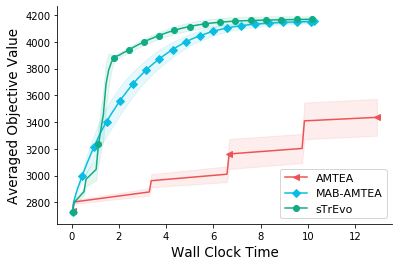

In [20]:
plt.figure()
plot_mean_std(conv_fitness_hist_transfer[None], SRC_COLORS[-2], 'AMTEA', SRC_SHAPES[-2], conv_fitness_time_transfer[:], std=True, data_std=conv_std_fitness_hist_transfer)
plot_mean_std(conv_fitness_hist_bandit[None], SRC_COLORS[-1], 'MAB-AMTEA', SRC_SHAPES[-1], conv_fitness_time_bandit[:], std=True, data_std=conv_std_fitness_hist_bandit)
plot_mean_std(conv_fitness_hist_cc[None], TARGET_COLOR, 'sTrEvo', TARGET_SHAPE, conv_fitness_time_cc[:], std=True, data_std=conv_std_fitness_hist_cc)
# plt.vlines(con_converge_times.mean(), multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max(), linestyles='dashed')
design_plot()
# plt.legend(loc='lower right')
save_plot('plots/knapsack/A/kp1000-40-related-time.pdf')
# plt.ylim(multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max() + 50)
# plt.xticks(list(range(0,81, 20)) + [con_converge_times.mean()] + list(range(120,161, 20)))
# plt.savefig('plots/average_AMTEA.jpg')

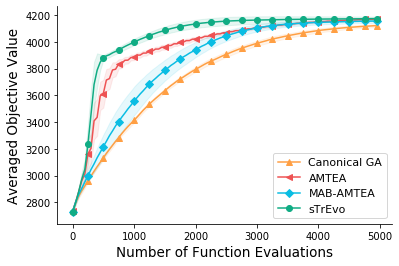

In [21]:
plt.figure()

plot_mean_std(fitness_ea_knapsack[:, :], SRC_COLORS[-3], 'Canonical GA', SRC_SHAPES[-3], std=True, x_interval=50)
plot_mean_std(fitness_hist_transfer[:, :], SRC_COLORS[-2], 'AMTEA', SRC_SHAPES[-2], std=True, x_interval=50)
plot_mean_std(fitness_hist_bandit[:, :], SRC_COLORS[-1], 'MAB-AMTEA', SRC_SHAPES[-1], std=True, x_interval=50)
plot_mean_std(fitness_hist_cc[:, :], TARGET_COLOR, 'sTrEvo', TARGET_SHAPE, std=True, x_interval=50)
# plt.vlines(con_converge_times.mean(), multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max(), linestyles='dashed')
design_plot('f')
save_plot('plots/knapsack/A/kp1000-40-related-generation.pdf')
# plt.ylim(multi_transfer_knapsack_kp4_fitness_acc.min()-50, multi_transfer_knapsack_kp4_fitness_acc.max() + 50)
# plt.xticks(list(range(0,81, 20)) + [con_converge_times.mean()] + list(range(120,161, 20)))
# plt.savefig('plots/average_AMTEA.jpg')

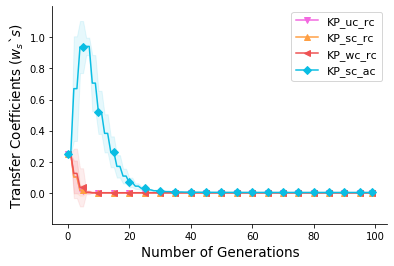

In [22]:
c = to_right_gen(np.array(genes_list_cc))
plt.figure()

plot_mean_std(c[:, :,0:250].sum(2)/c.sum(axis=2), SRC_COLORS[-4], 'KP_uc_rc', SRC_SHAPES[-4])
plot_mean_std(c[:, :,500:750].sum(2)/c.sum(axis=2), SRC_COLORS[-3], 'KP_sc_rc', SRC_SHAPES[-3])
plot_mean_std(c[:, :,250:500].sum(2)/c.sum(axis=2), SRC_COLORS[-2], 'KP_wc_rc', SRC_SHAPES[-2])
plot_mean_std(c[:, :,750:1000].sum(2)/c.sum(axis=2), SRC_COLORS[-1], 'KP_sc_ac', SRC_SHAPES[-1])
# plot_mean_std(c[:, :,1000]/c.sum(axis=2), TARGET_COLOR, "KP_uc_ac (Target)", TARGET_SHAPE)
plt.yticks([0, .2, .4, .6, .8, 1.])

design_plot(x_label='g', y_label='c')
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
save_plot('plots/knapsack/A/kp1000-40-related-cc-learning.pdf')

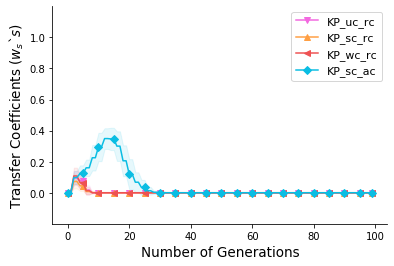

In [23]:
c = to_right_gen(np.array(alpha_transfer))
plt.figure()

plot_mean_std(c[:, :,0:250].sum(2)/c.sum(axis=2), SRC_COLORS[-4], 'KP_uc_rc', SRC_SHAPES[-4])
plot_mean_std(c[:, :,500:750].sum(2)/c.sum(axis=2), SRC_COLORS[-3], 'KP_sc_rc', SRC_SHAPES[-3])
plot_mean_std(c[:, :,250:500].sum(2)/c.sum(axis=2), SRC_COLORS[-2], 'KP_wc_rc', SRC_SHAPES[-2])
plot_mean_std(c[:, :,750:1000].sum(2)/c.sum(axis=2), SRC_COLORS[-1], 'KP_sc_ac', SRC_SHAPES[-1])
# plot_mean_std(c[:, :,1000]/c.sum(axis=2), TARGET_COLOR, "KP_uc_ac (Target)", TARGET_SHAPE)

design_plot(y_label='c', x_label='g')
# plt.legend(loc='lower right')
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
save_plot('plots/knapsack/A/kp1000-40-related-transfer-learning.pdf')

([<matplotlib.axis.YTick at 0x7fcfb057dd10>,
 <a list of 6 Text yticklabel objects>)

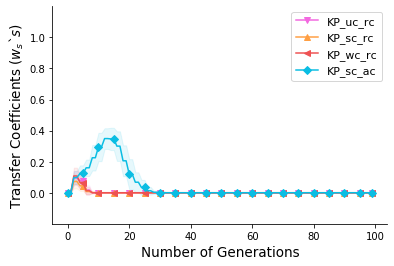

In [24]:
c = to_right_gen(np.array(alpha_transfer))
plt.figure()

plot_mean_std(c[:, :,0:250].sum(2)/c.sum(axis=2), SRC_COLORS[-4], 'KP_uc_rc', SRC_SHAPES[-4])
plot_mean_std(c[:, :,500:750].sum(2)/c.sum(axis=2), SRC_COLORS[-3], 'KP_sc_rc', SRC_SHAPES[-3])
plot_mean_std(c[:, :,250:500].sum(2)/c.sum(axis=2), SRC_COLORS[-2], 'KP_wc_rc', SRC_SHAPES[-2])
plot_mean_std(c[:, :,750:1000].sum(2)/c.sum(axis=2), SRC_COLORS[-1], 'KP_sc_ac', SRC_SHAPES[-1])
# plot_mean_std(c[:, :,1000]/c.sum(axis=2), TARGET_COLOR, "KP_uc_ac (Target)", TARGET_SHAPE)

design_plot(y_label='c', x_label='g')
# plt.legend(loc='lower right')
plt.ylim(-0.2, 1.2)
plt.yticks([0, .2, .4, .6, .8, 1.])
# save_plot('plots/knapsack/A/kp1000-40-related-transfer-learning.pdf')